# Statistical Analysis of Clustering Results
This notebook performs statistical analysis on the clustering results, including ANOVA for 3-cluster solutions and t-tests for 2-cluster solutions. The analysis is performed both with and without dummy variables to ensure robust results.

## 1. Setup and Data Loading

- Import required libraries
- Load clustering results
- Configure visualization settings

In [2]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, ttest_ind
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Set global visualization parameters
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
sns.set_palette("Set2")

# Helper functions
def create_statistical_table(df, group_col, results, n_groups):
    """Create statistical table with means and standard deviations"""
    groups = df[group_col].unique()
    
    if n_groups == 3:
        latex_table = "\\begin{tabular}{lcccccc}\n"
        latex_table += "Feature & Mean G1 & SD G1 & Mean G2 & SD G2 & Mean G3 & SD G3 & p-value \\\\\n"
    else:
        latex_table = "\\begin{tabular}{lcccc}\n"
        latex_table += "Feature & Mean G1 & SD G1 & Mean G2 & SD G2 & p-value \\\\\n"
    
    latex_table += "\\hline\n"
    
    for variable, stats in results:
        means = []
        sds = []
        for group in range(n_groups):
            group_data = df[df[group_col] == group][variable]
            means.append(group_data.mean())
            sds.append(group_data.std())
        
        stats_str = " & ".join([f"{m:.2f} & {s:.2f}" for m, s in zip(means, sds)])
        latex_table += f"{variable} & {stats_str} & {stats[-1]:.4f} \\\\\n"
    
    latex_table += "\\end{tabular}"
    return latex_table

def plot_density_distributions(df, variables, group_col, title_prefix=""):
    """Create density plots for specified variables"""
    for var in variables:
        plt.figure(figsize=(10, 6))
        for group in sorted(df[group_col].unique()):
            group_data = df[df[group_col] == group][var]
            sns.kdeplot(data=group_data, label=f'Cluster {group}', fill=True)
        
        plt.title(f'{title_prefix} {var}')
        plt.xlabel(var)
        plt.ylabel('Density')
        plt.legend()
        plt.tight_layout()
        plt.show()

## 2. Three-Cluster Analysis

- ANOVA testing for all variables
- Generation of statistical tables
- Density plots for significant variables
- Analysis without dummy variables

LaTeX Table for Three-Cluster Analysis:
\begin{tabular}{lcccccc}
Feature & Mean G1 & SD G1 & Mean G2 & SD G2 & Mean G3 & SD G3 & p-value \\
\hline
p_part & 38.93 & 16.63 & 76.59 & 9.12 & 74.02 & 10.99 & 0.0000 \\
p_eligibility & 43.77 & 13.06 & 74.36 & 10.24 & 74.80 & 14.18 & 0.0000 \\
p_part_exp & 52.67 & 17.49 & 83.01 & 11.17 & 83.46 & 9.87 & 0.0000 \\
p_fund_org & 57.48 & 30.59 & 23.63 & 6.68 & 56.30 & 18.62 & 0.0000 \\
p_fund_gov & 14.25 & 12.24 & 23.10 & 10.23 & 12.40 & 9.44 & 0.0000 \\
tr_sk_n_f_finance & 0.23 & 0.43 & 0.11 & 0.32 & 0.54 & 0.50 & 0.0000 \\
p_fund_other & 3.25 & 8.47 & 10.19 & 10.79 & 2.10 & 5.45 & 0.0000 \\
p_fund_wrk & 12.33 & 12.11 & 22.87 & 10.91 & 15.20 & 10.97 & 0.0000 \\
presp2 & 0.32 & 0.47 & 0.74 & 0.44 & 0.64 & 0.48 & 0.0000 \\
p_resp_hr & 0.32 & 0.47 & 0.74 & 0.44 & 0.64 & 0.48 & 0.0000 \\
p_responsibility_HR Leaders & 0.32 & 0.47 & 0.74 & 0.44 & 0.64 & 0.48 & 0.0000 \\
p_responsibility_hier_HR & 0.32 & 0.47 & 0.74 & 0.44 & 0.64 & 0.48 & 0.0000 \\
sk_n_

<Figure size 800x600 with 0 Axes>

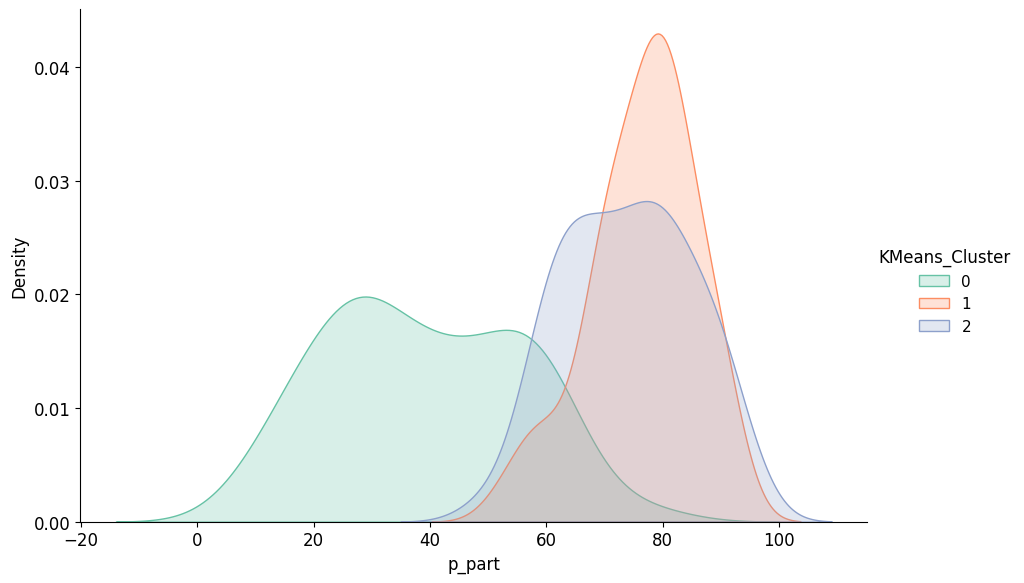

<Figure size 800x600 with 0 Axes>

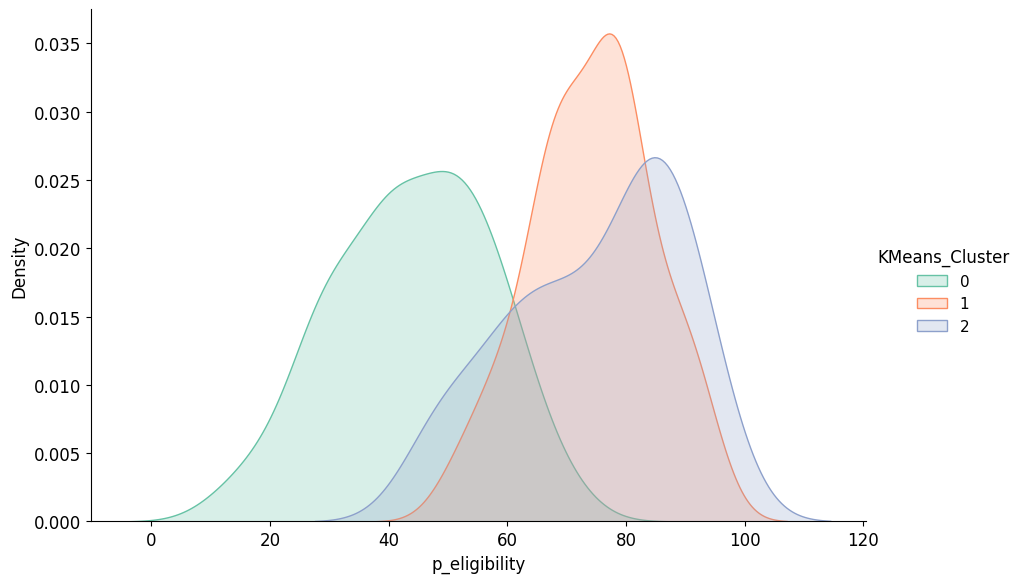

<Figure size 800x600 with 0 Axes>

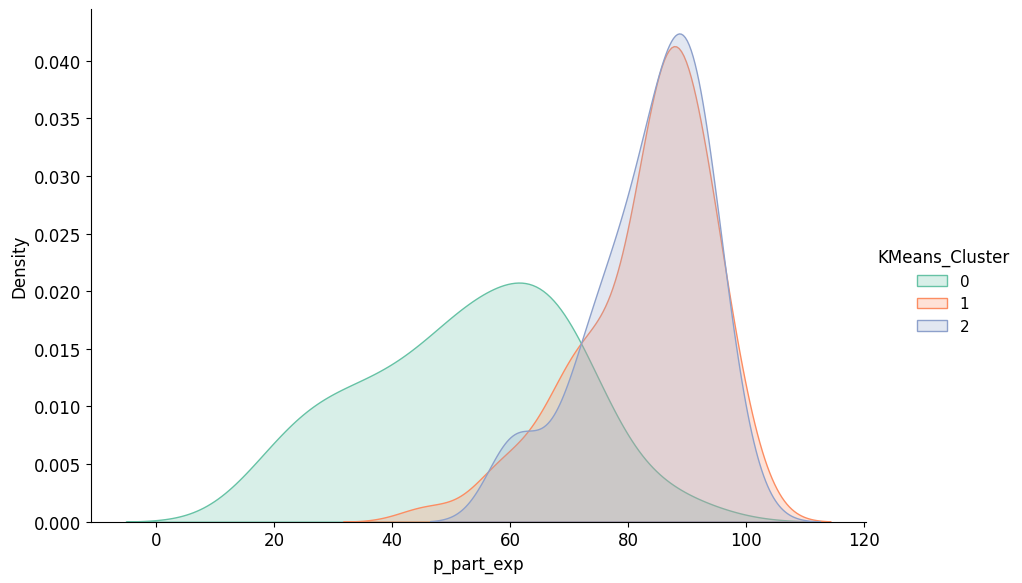

<Figure size 800x600 with 0 Axes>

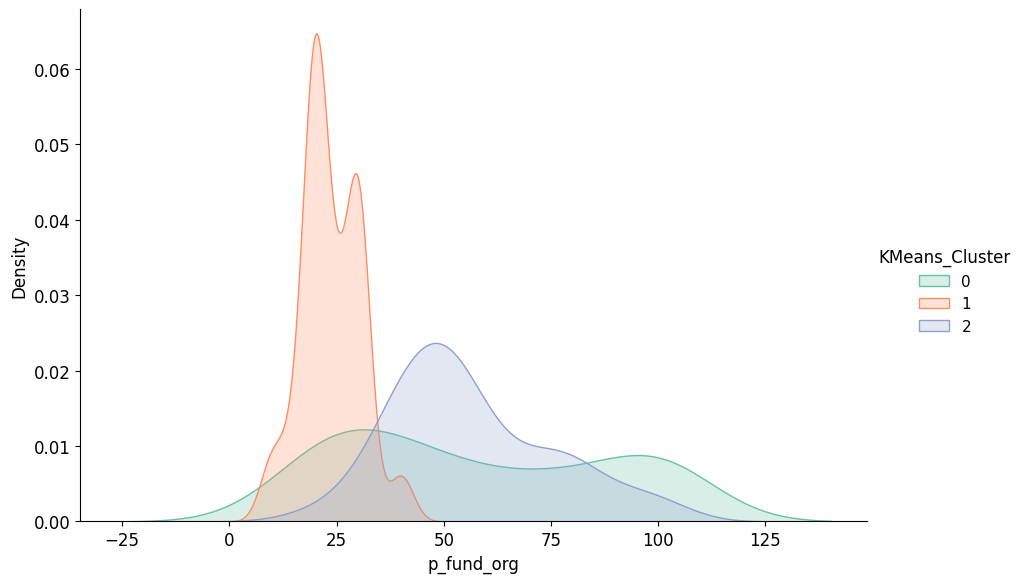

<Figure size 800x600 with 0 Axes>

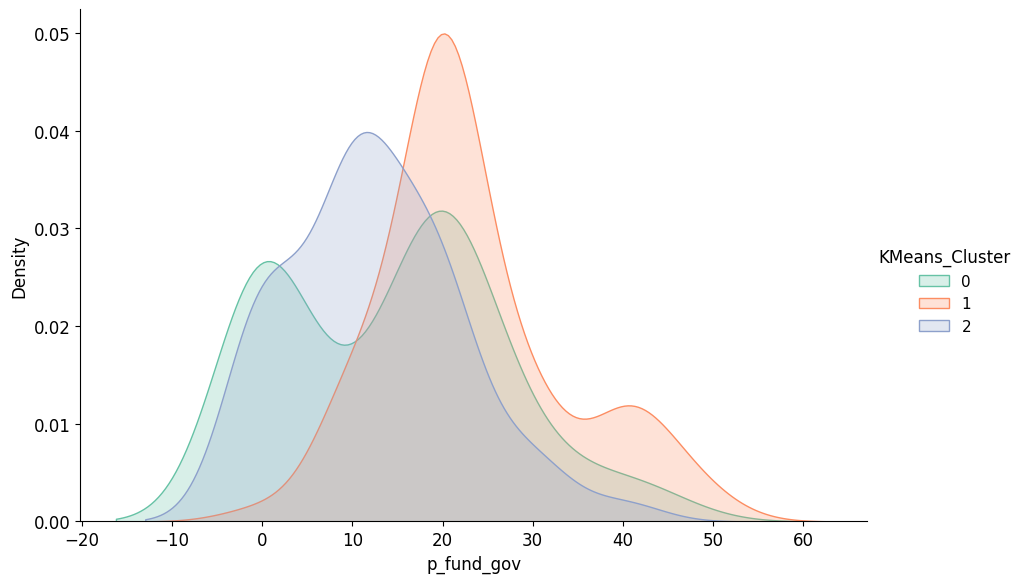

<Figure size 800x600 with 0 Axes>

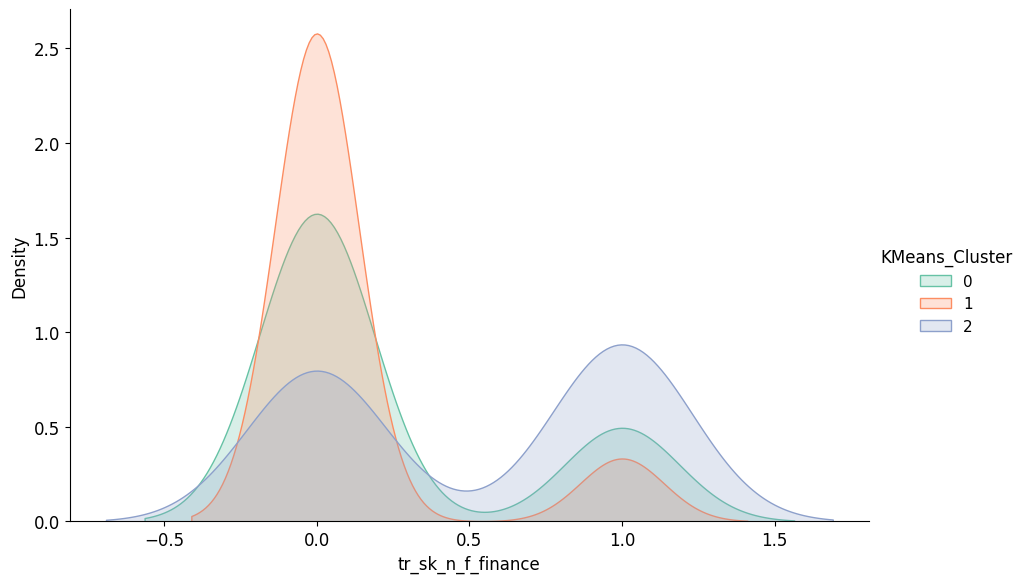

<Figure size 800x600 with 0 Axes>

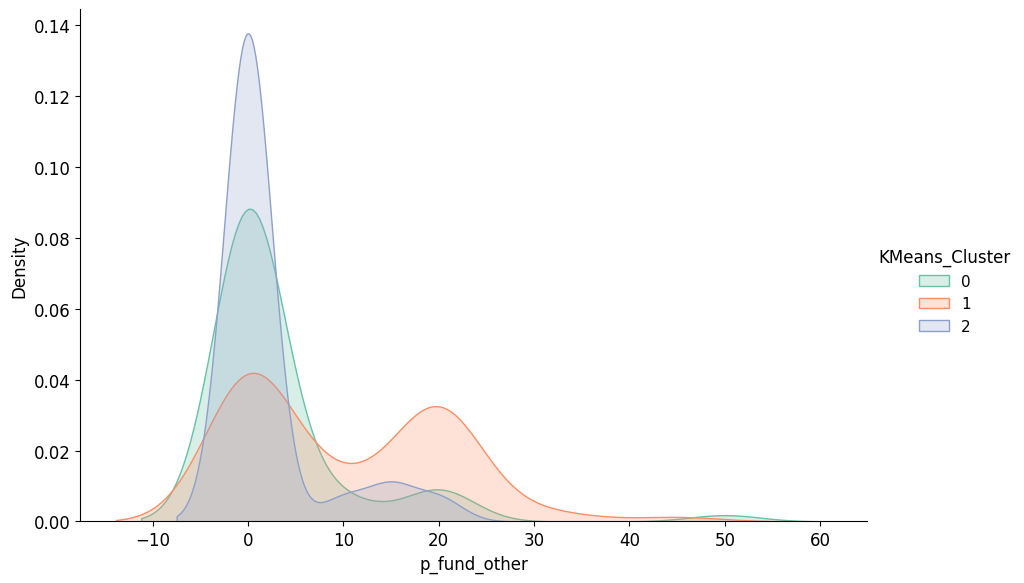

<Figure size 800x600 with 0 Axes>

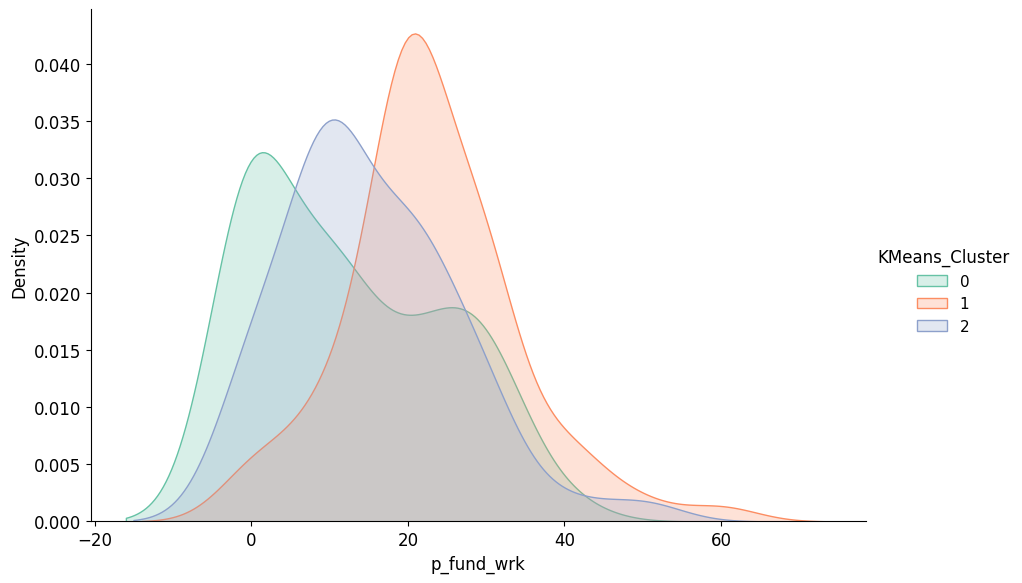

<Figure size 800x600 with 0 Axes>

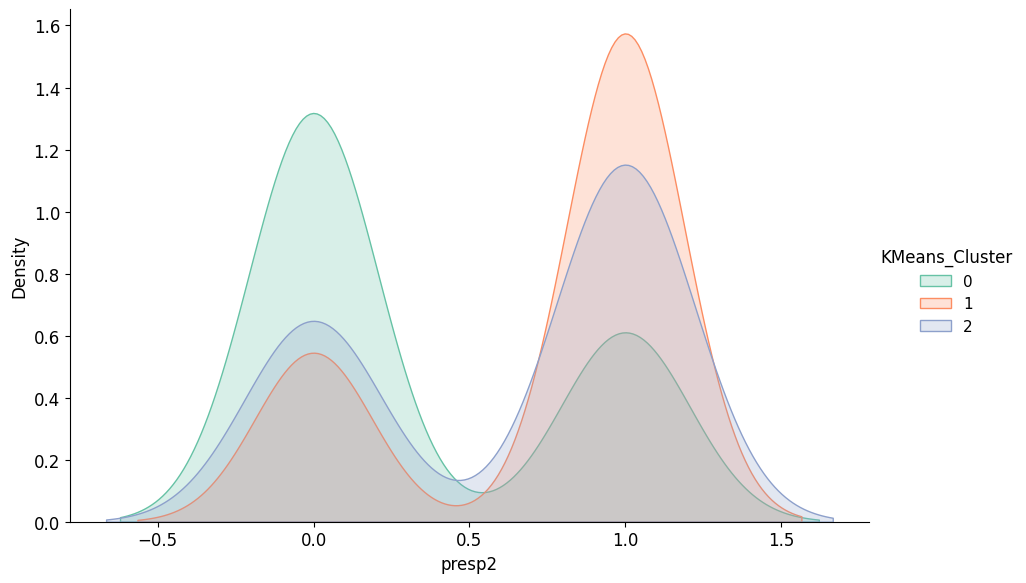

<Figure size 800x600 with 0 Axes>

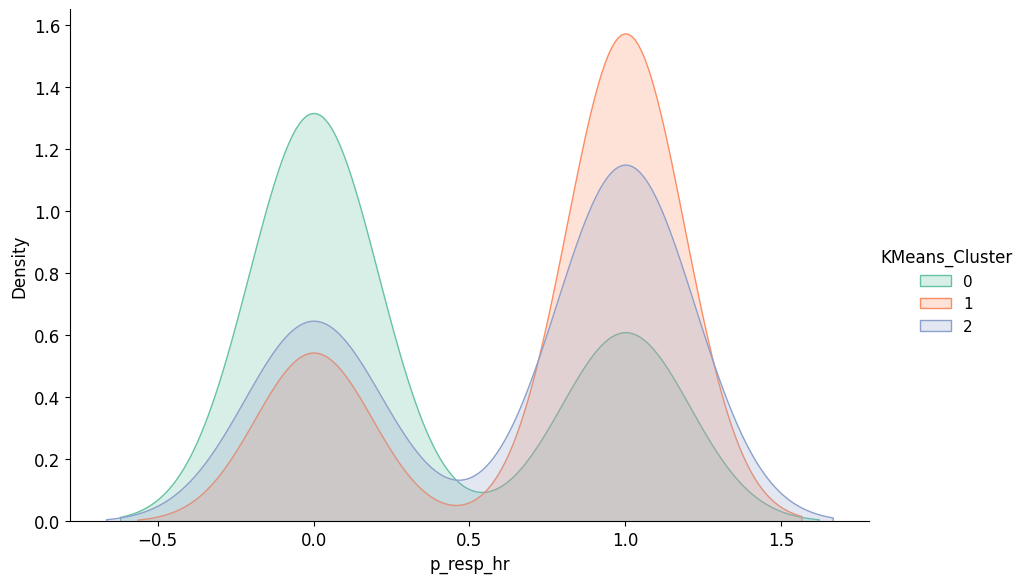

<Figure size 800x600 with 0 Axes>

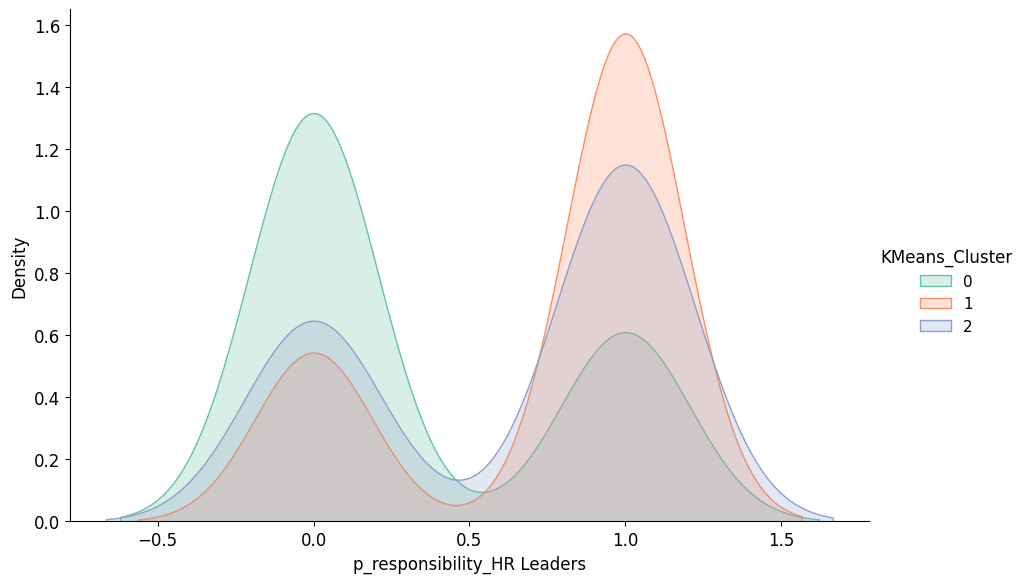

<Figure size 800x600 with 0 Axes>

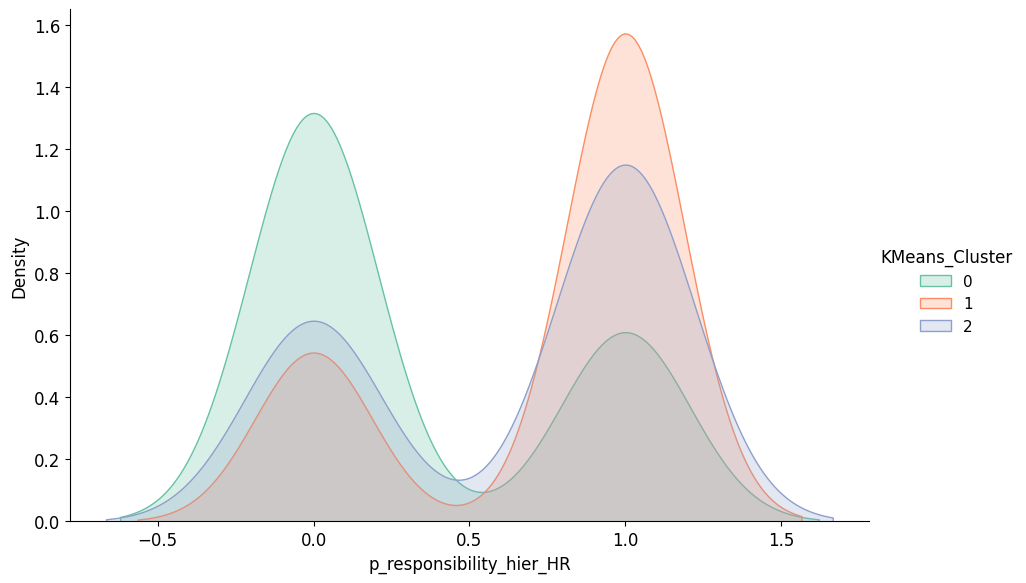

<Figure size 800x600 with 0 Axes>

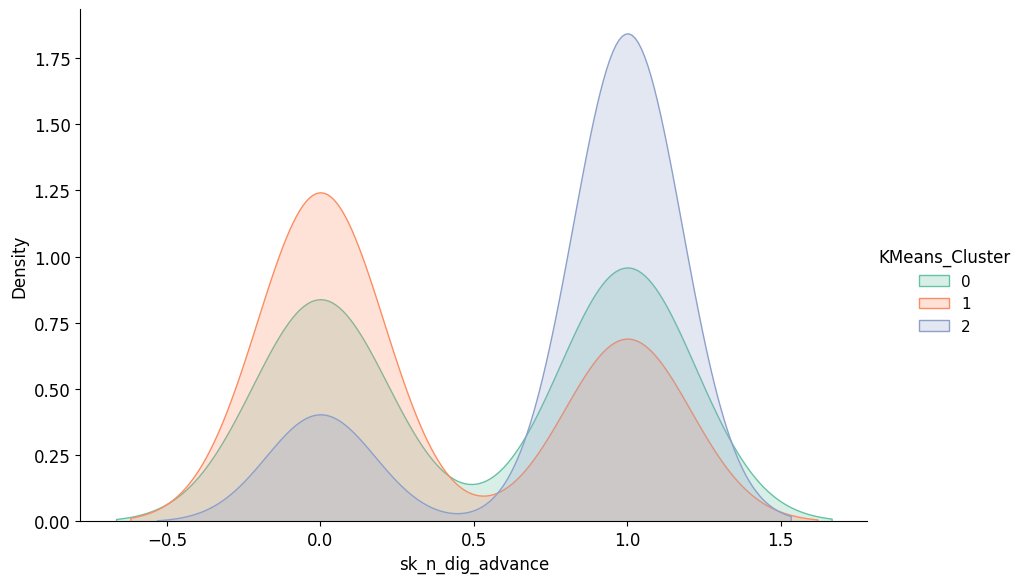

<Figure size 800x600 with 0 Axes>

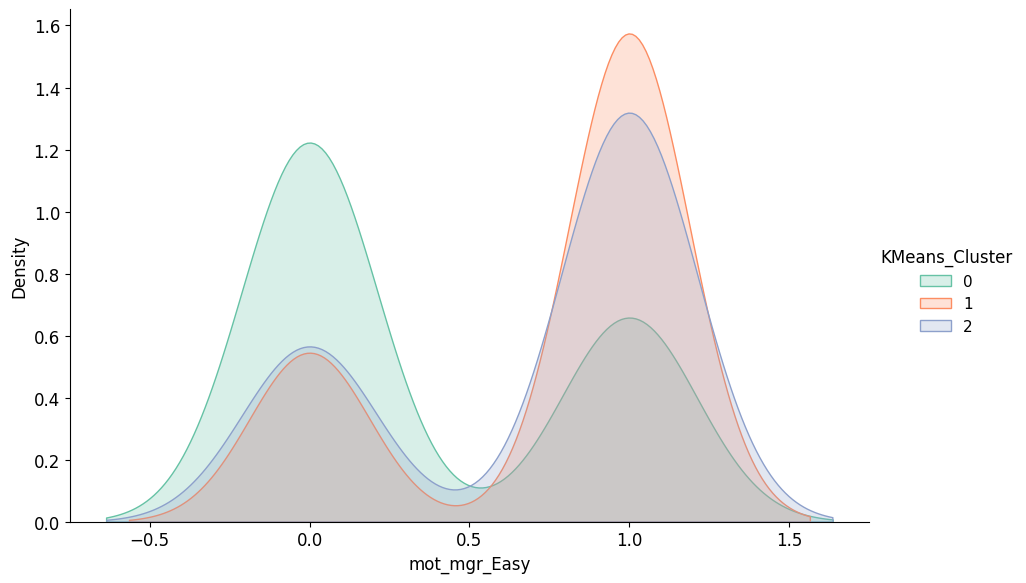

<Figure size 800x600 with 0 Axes>

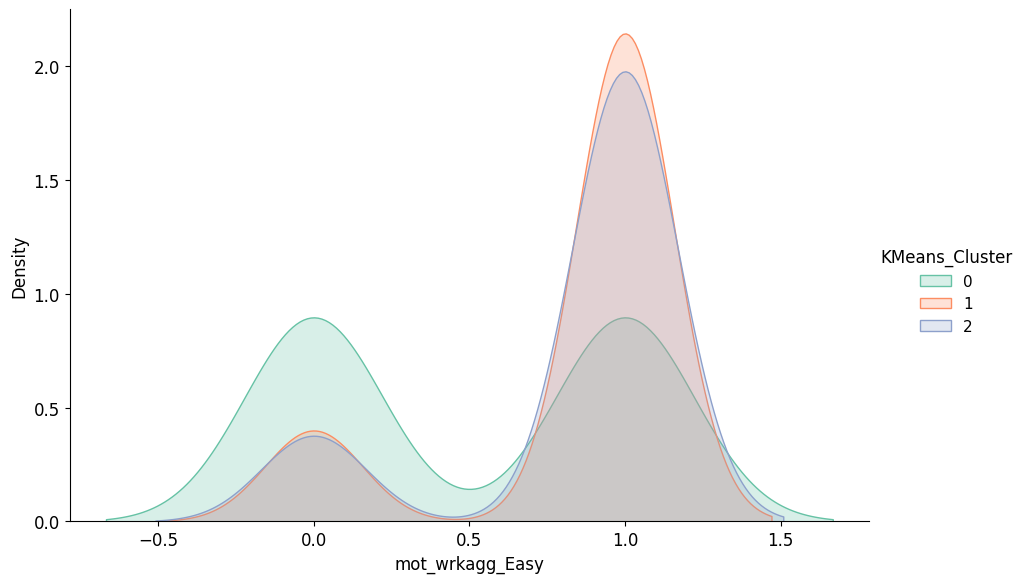

<Figure size 800x600 with 0 Axes>

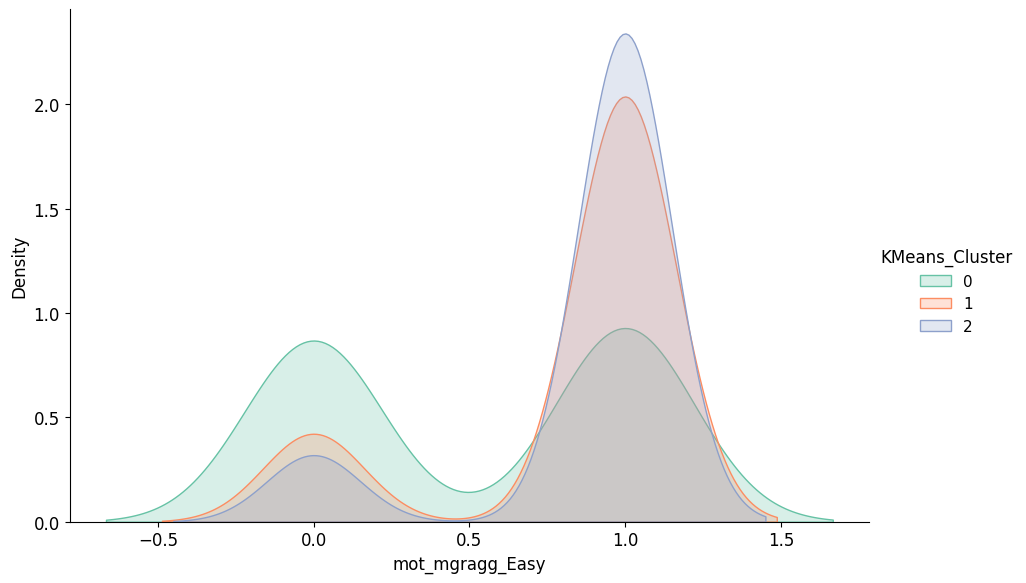

<Figure size 800x600 with 0 Axes>

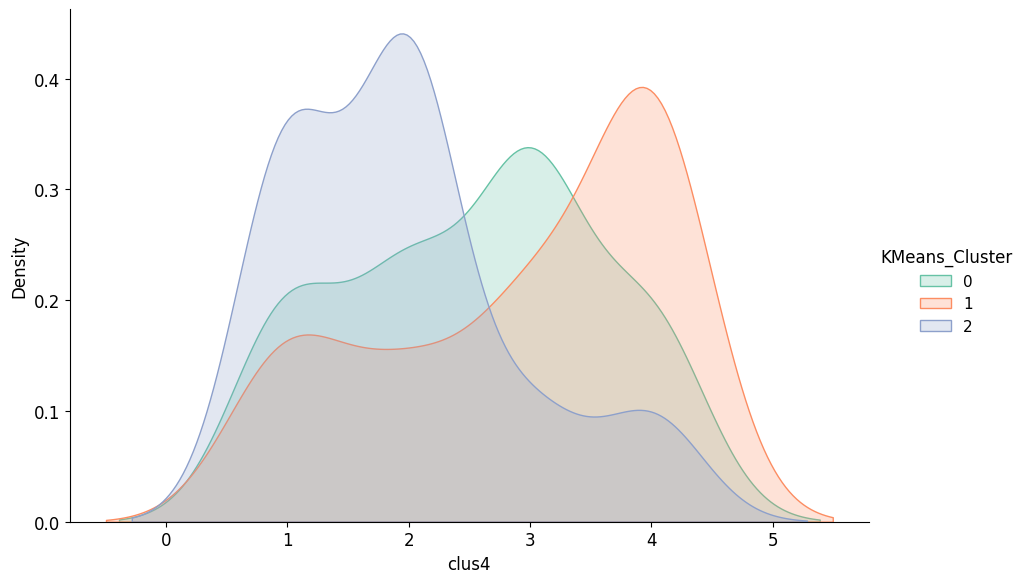

<Figure size 800x600 with 0 Axes>

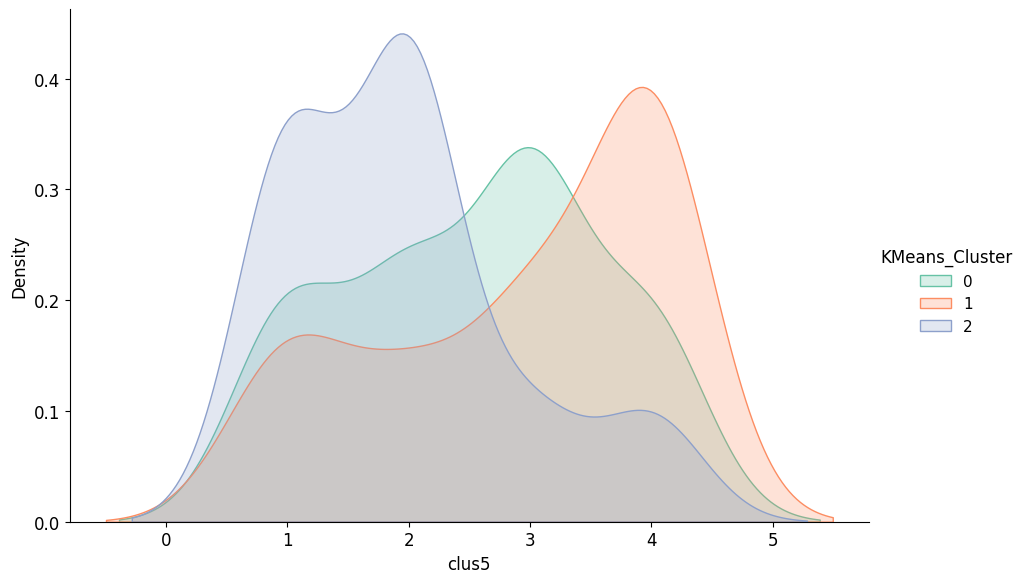

<Figure size 800x600 with 0 Axes>

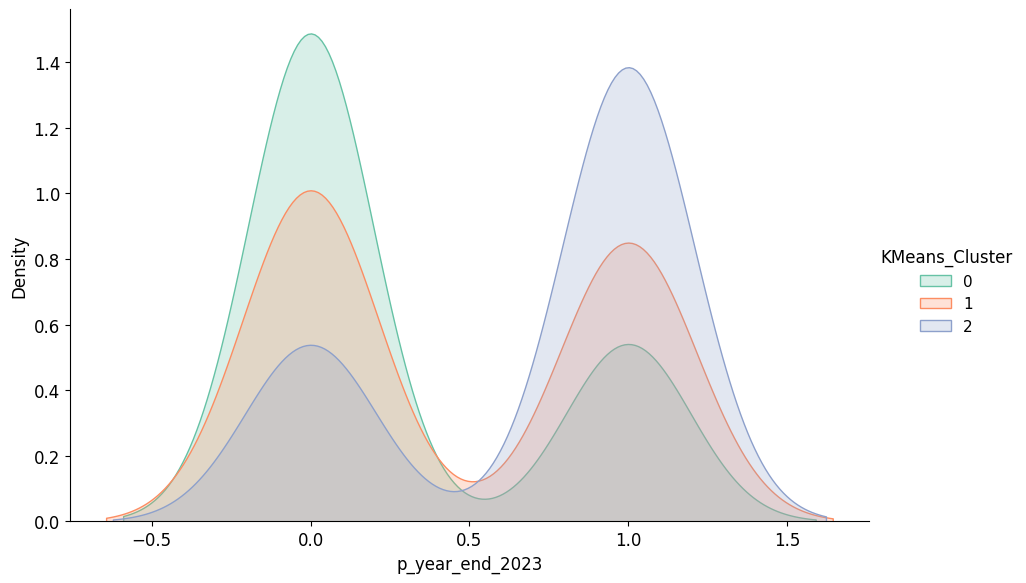

<Figure size 800x600 with 0 Axes>

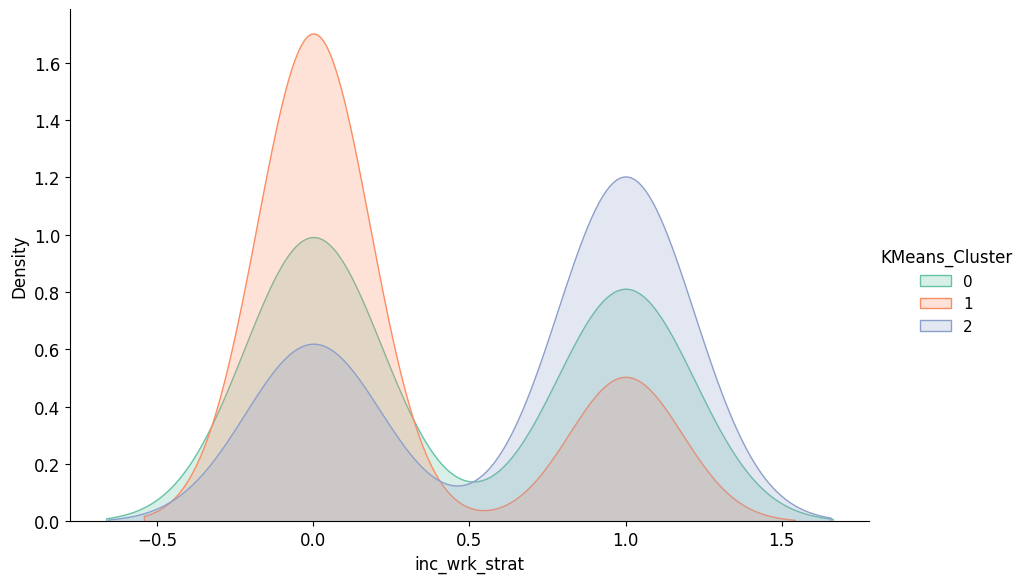


Significant Variables (No Dummies):
                 Variable       p_value
0                f_size_n  1.259988e-04
1            f_sub_number  2.084603e-02
4        p_program_length  5.016184e-05
5              p_fund_gov  0.000000e+00
6              p_fund_org  0.000000e+00
7              p_fund_wrk  0.000000e+00
8            p_fund_union  0.000000e+00
9            p_fund_other  1.171125e-37
10          p_eligibility  8.470849e-42
11                 p_part  0.000000e+00
12             p_part_exp  0.000000e+00
13       p_effect_reverse  1.522909e-03
15            b_sk_n_soft  4.161052e-03
17         b_sk_n_digital  5.036998e-03
18      b_sk_n_functional  1.523025e-02
19            sk_selected  4.052420e-03
20        sha_b_sk_n_soft  7.516664e-03
23  sha_b_sk_n_functional  4.169660e-02
24                  clus4  4.247892e-03
25                  clus5  4.247892e-03
28         tr_eligibility  8.470849e-42
29                tr_part  0.000000e+00
30            tr_part_exp  0.000000e+00
31 

<Figure size 800x600 with 0 Axes>

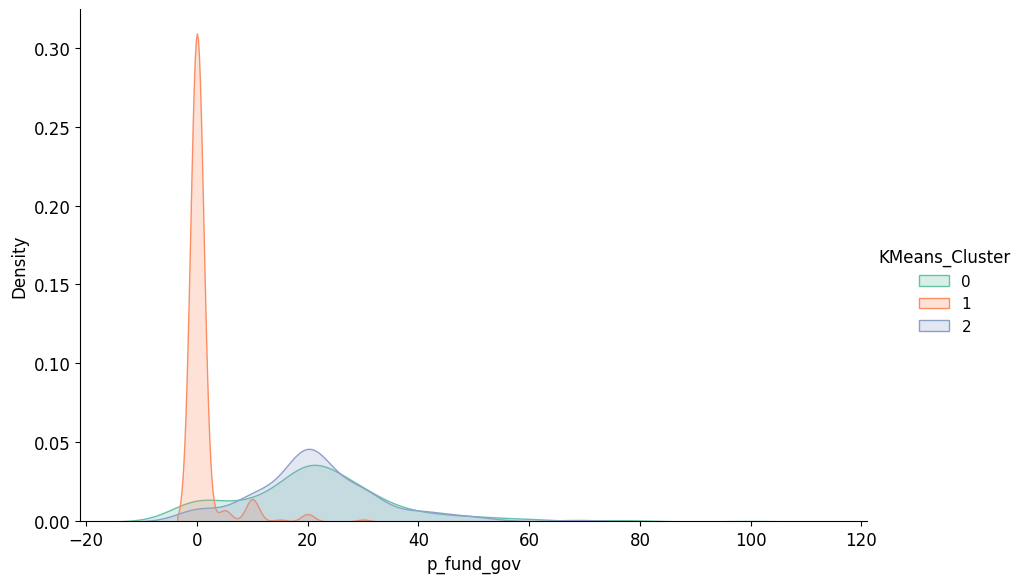

<Figure size 800x600 with 0 Axes>

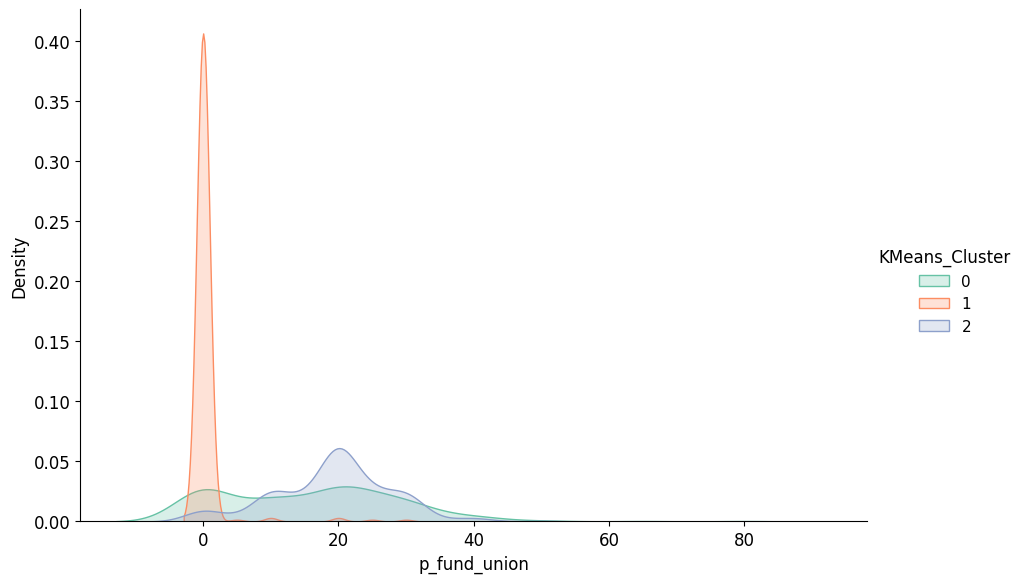

<Figure size 800x600 with 0 Axes>

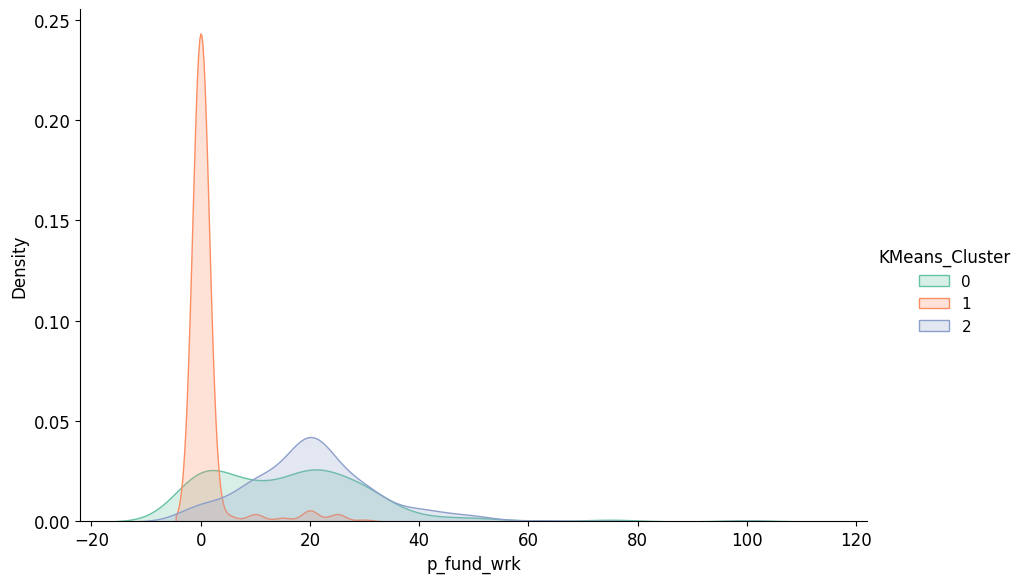

<Figure size 800x600 with 0 Axes>

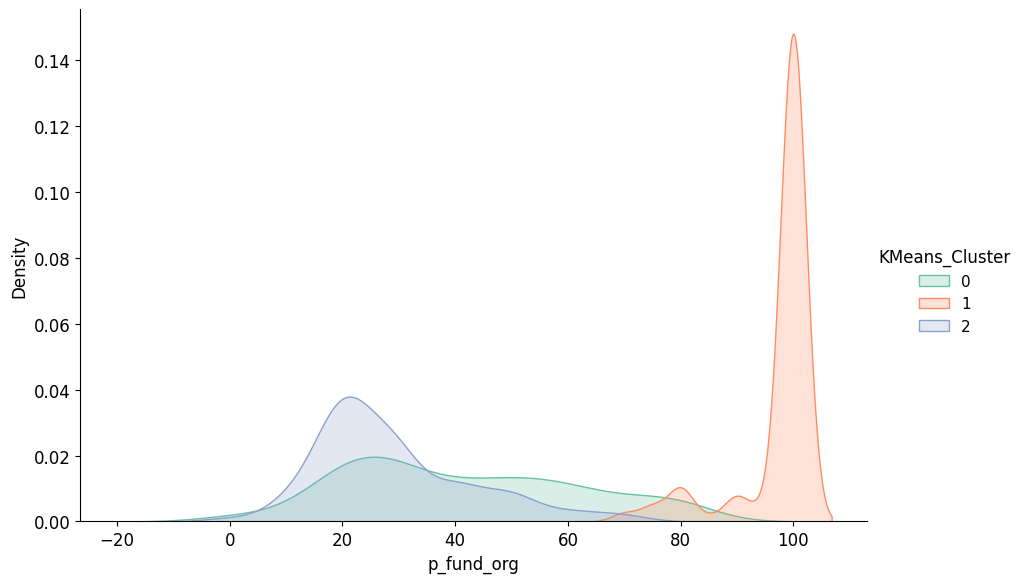

<Figure size 800x600 with 0 Axes>

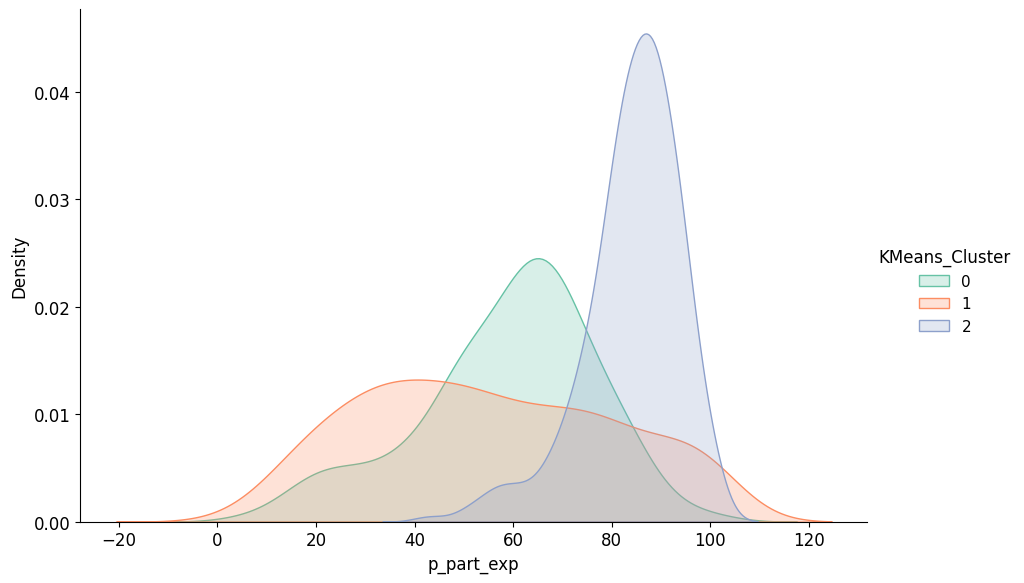

<Figure size 800x600 with 0 Axes>

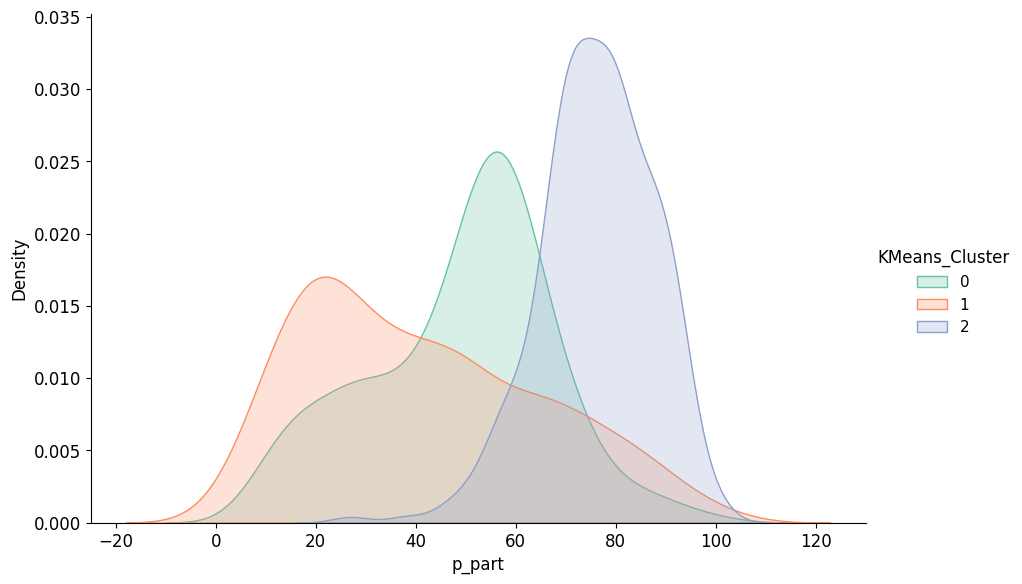

<Figure size 800x600 with 0 Axes>

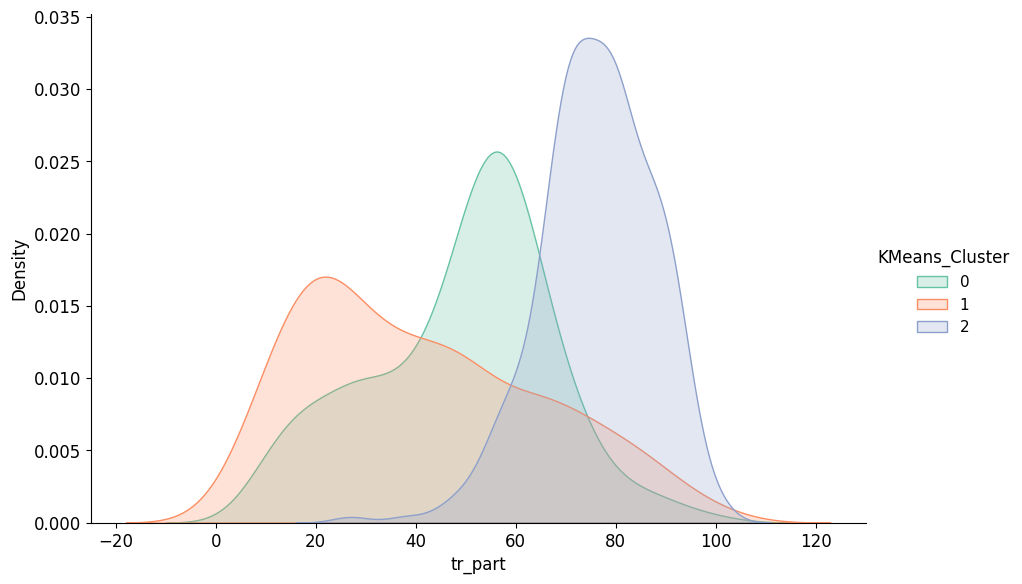

<Figure size 800x600 with 0 Axes>

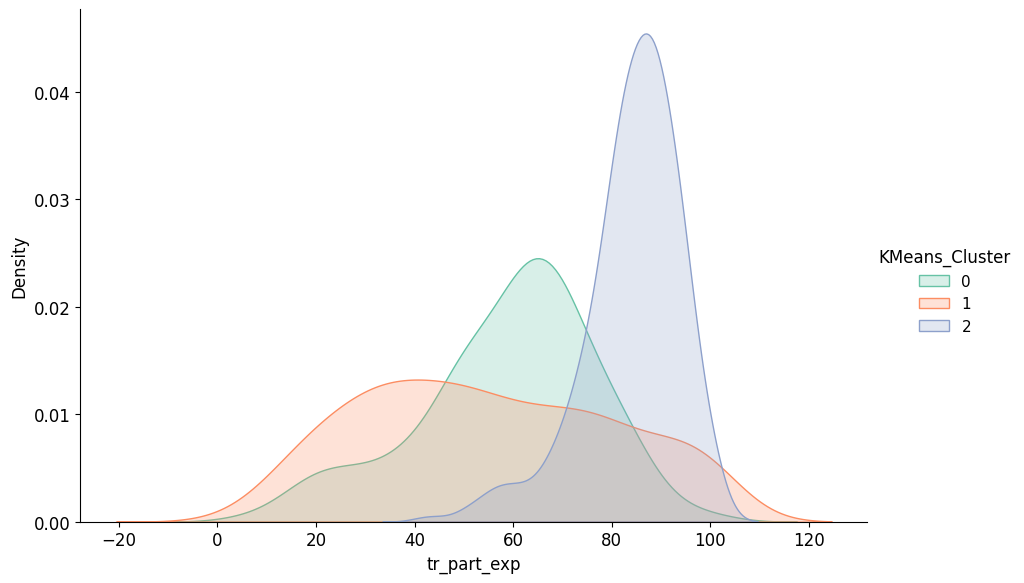

<Figure size 800x600 with 0 Axes>

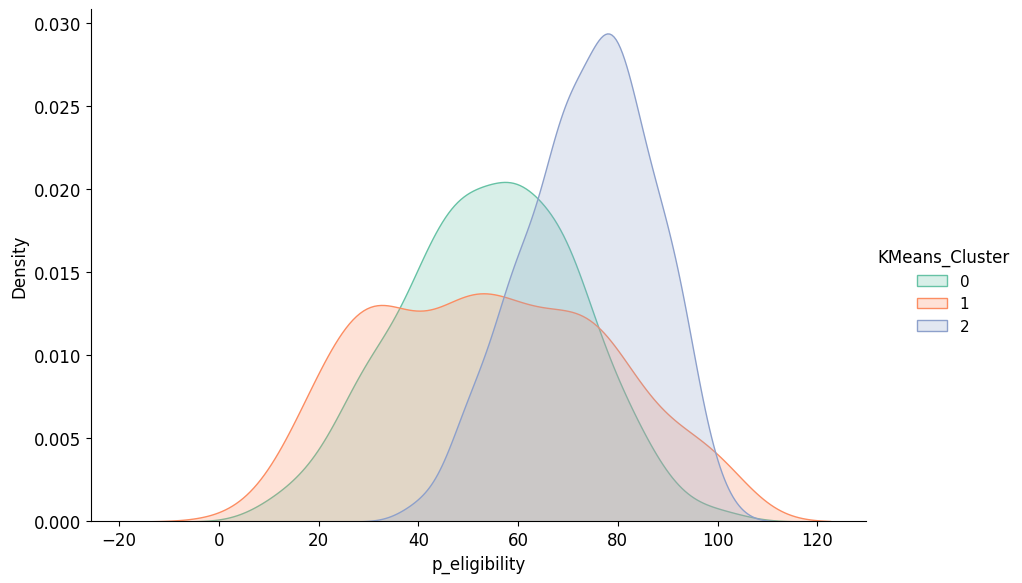

<Figure size 800x600 with 0 Axes>

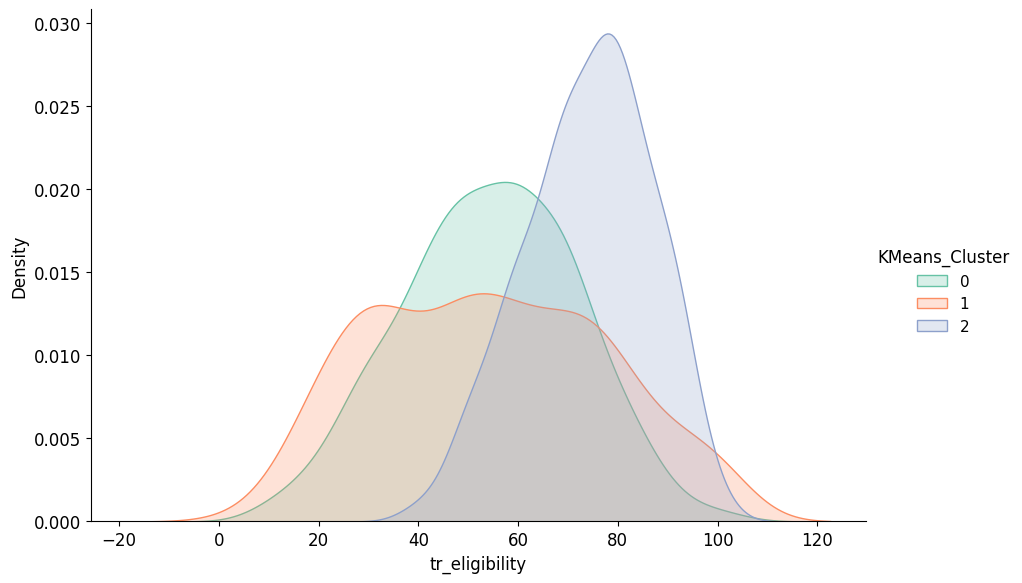

<Figure size 800x600 with 0 Axes>

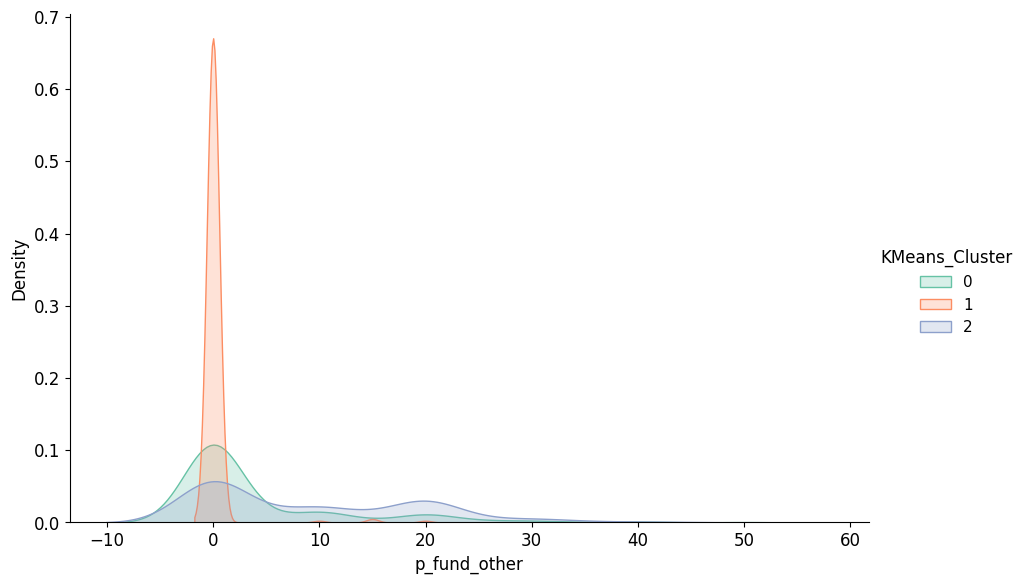

<Figure size 800x600 with 0 Axes>

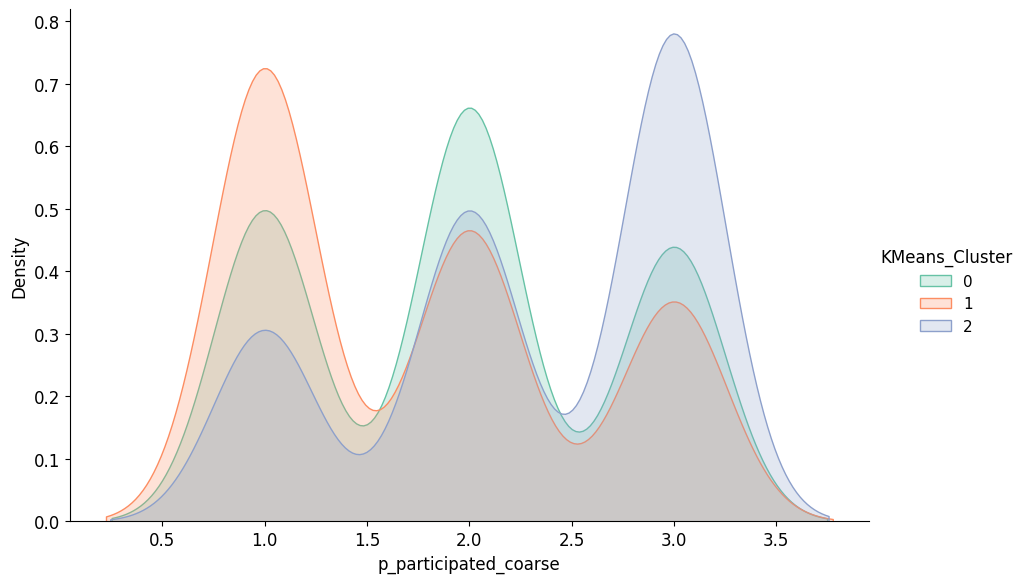

<Figure size 800x600 with 0 Axes>

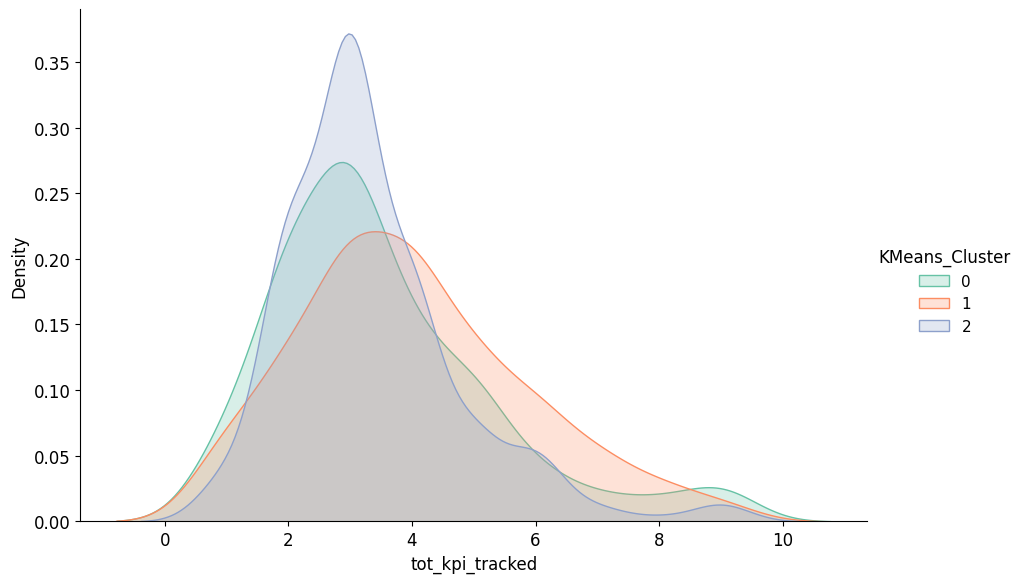

<Figure size 800x600 with 0 Axes>

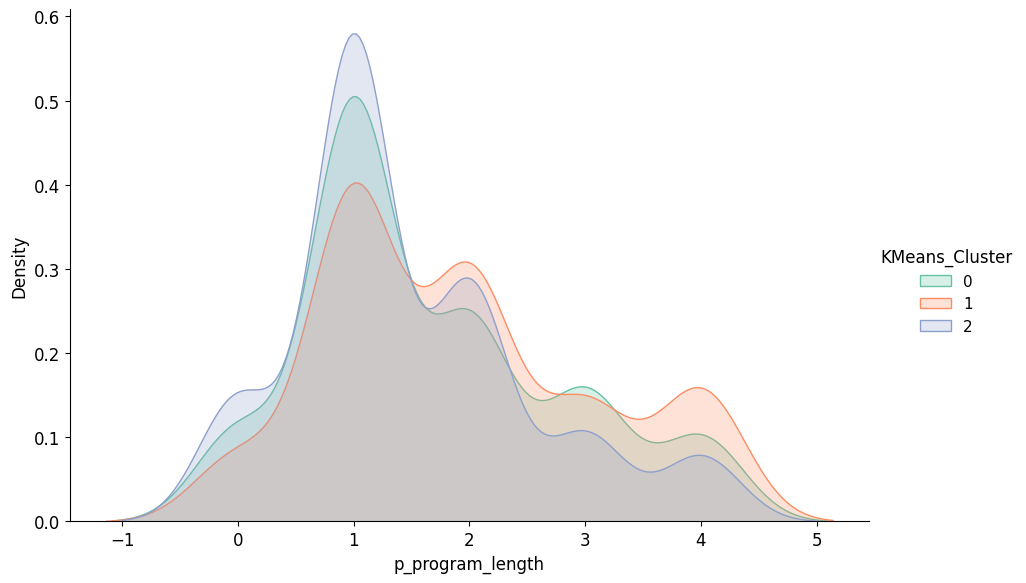

<Figure size 800x600 with 0 Axes>

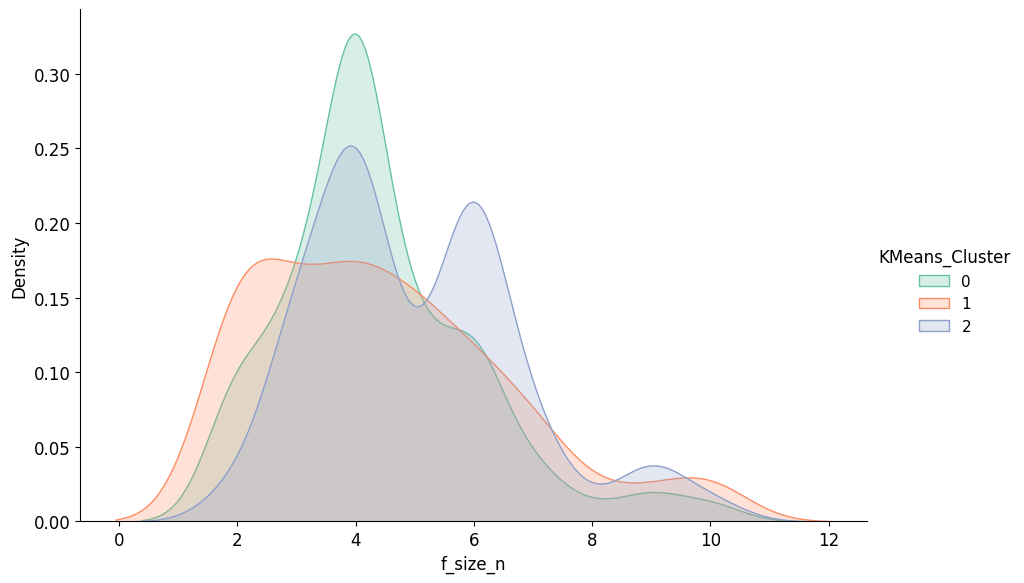

<Figure size 800x600 with 0 Axes>

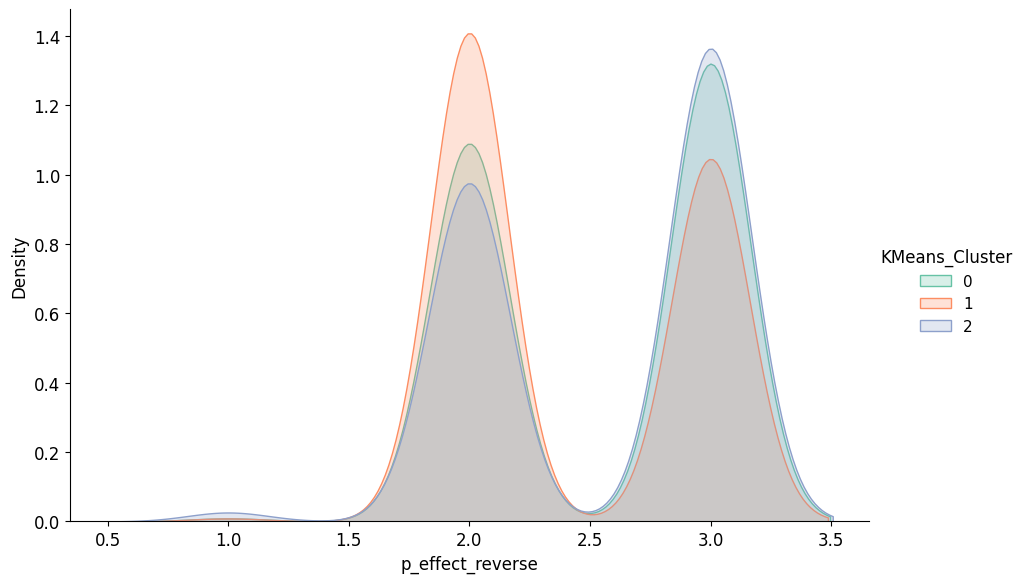

<Figure size 800x600 with 0 Axes>

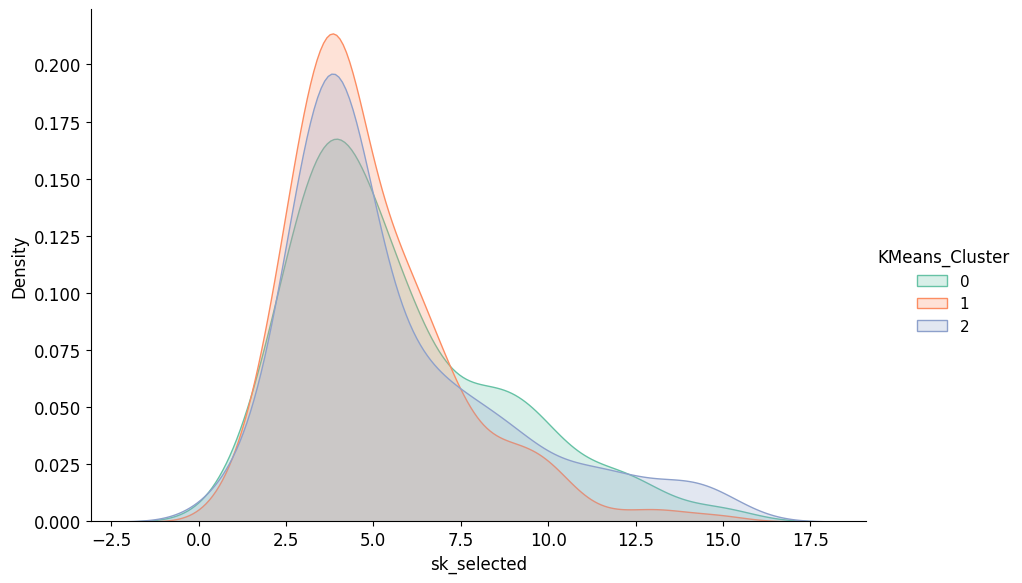

<Figure size 800x600 with 0 Axes>

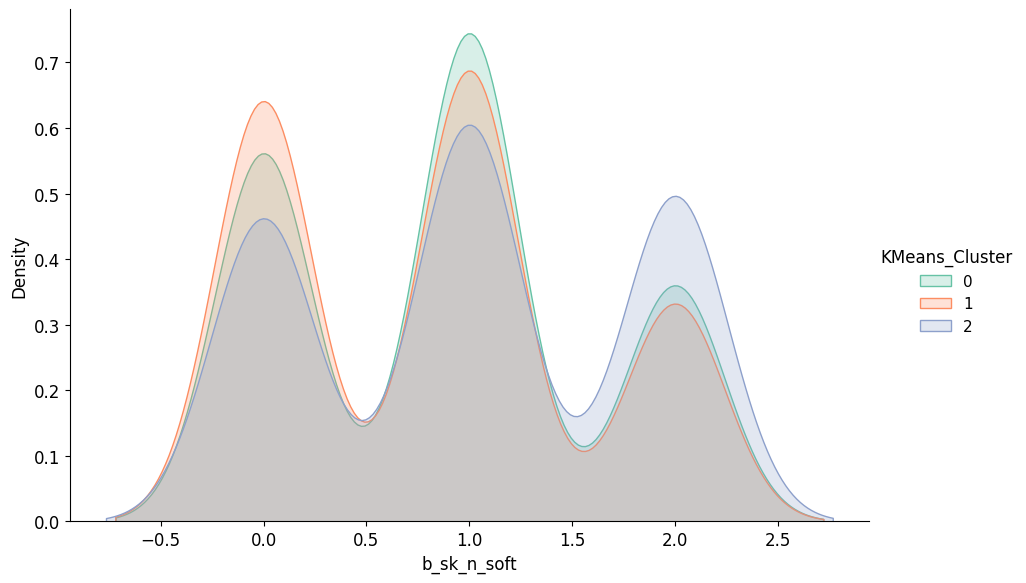

<Figure size 800x600 with 0 Axes>

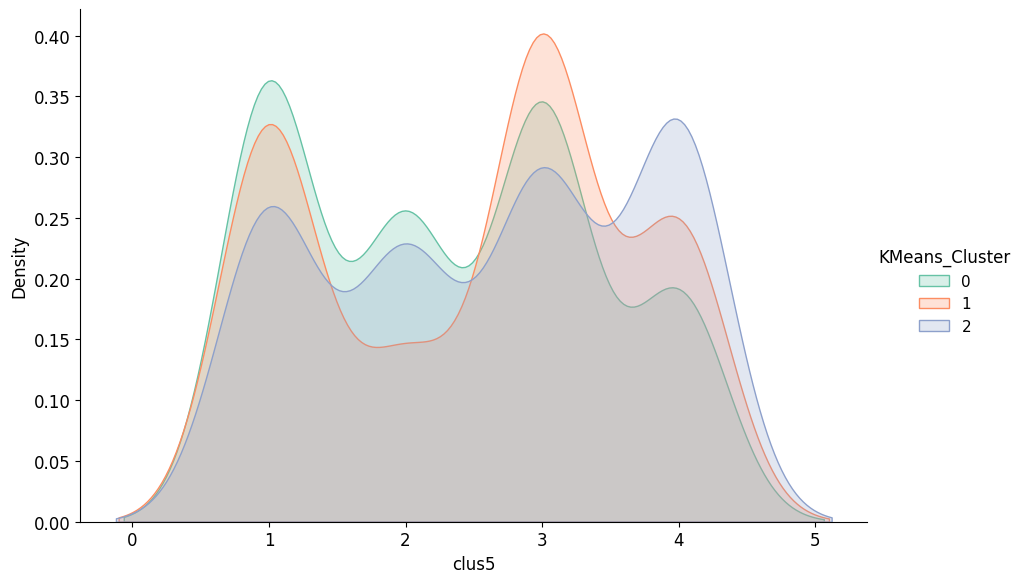

<Figure size 800x600 with 0 Axes>

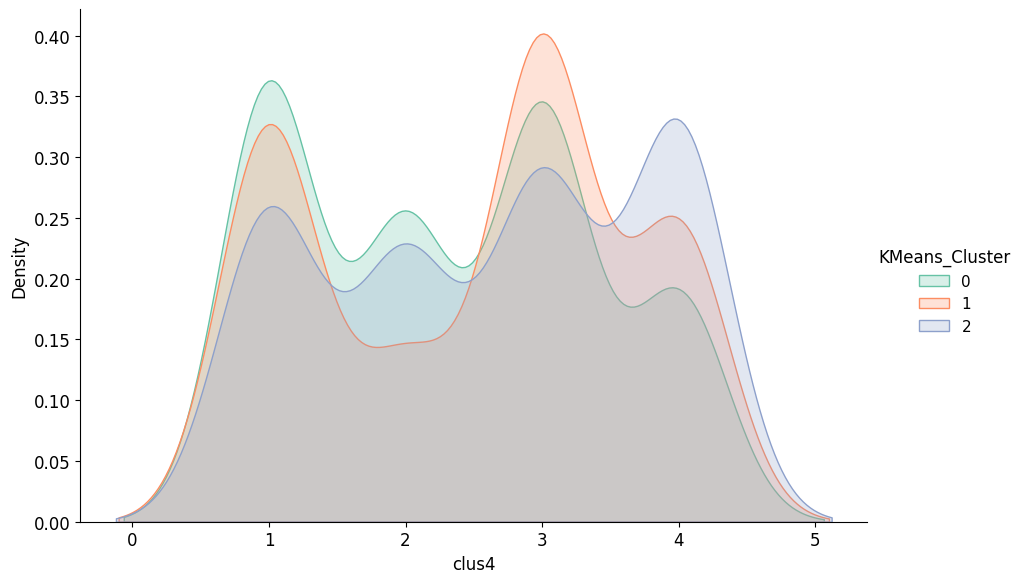

In [8]:
# Load and prepare 3-cluster data
df_3clusters = pd.read_csv("../Output/Results/clusters_3_construction.csv")
df_3clusters.drop(["tr_part", "tr_eligibility", "tr_part_exp"], axis=1, inplace=True)

# ANOVA Analysis
groups = df_3clusters['KMeans_Cluster'].unique()
p_values = {}

# Perform ANOVA for each variable
for column in df_3clusters.columns:
    if column != 'KMeans_Cluster':
        # Extract data for each group
        group_data = [df_3clusters[df_3clusters['KMeans_Cluster'] == group][column] 
                     for group in groups]
        
        # Perform ANOVA
        f_statistic, p_value = f_oneway(*group_data)
        p_values[column] = p_value

# Convert results to DataFrame
p_values_df = pd.DataFrame(list(p_values.items()), columns=['Variable', 'p_value'])
alpha = 0.05
significant_vars = p_values_df[p_values_df['p_value'] < alpha]
top_vars = significant_vars.sort_values('p_value').head(20)

# Generate LaTeX table
latex_table = "\\begin{tabular}{lcccccc}\n"
latex_table += "Feature & Mean G1 & SD G1 & Mean G2 & SD G2 & Mean G3 & SD G3 & p-value \\\\\n"
latex_table += "\\hline\n"

for _, row in top_vars.iterrows():
    variable = row['Variable']
    p_value = row['p_value']
    means = [df_3clusters[df_3clusters['KMeans_Cluster'] == group][variable].mean() 
             if not df_3clusters[df_3clusters['KMeans_Cluster'] == group][variable].empty 
             else np.nan for group in groups]
    sds = [df_3clusters[df_3clusters['KMeans_Cluster'] == group][variable].std() 
           if not df_3clusters[df_3clusters['KMeans_Cluster'] == group][variable].empty 
           else np.nan for group in groups]
    
    # Fill missing groups with NaN
    means.extend([np.nan] * (3 - len(means)))
    sds.extend([np.nan] * (3 - len(sds)))
    
    latex_table += f"{variable} & {means[0]:.2f} & {sds[0]:.2f} & {means[1]:.2f} & {sds[1]:.2f} & {means[2]:.2f} & {sds[2]:.2f} & {p_value:.4f} \\\\\n"

latex_table += "\\end{tabular}"

print("LaTeX Table for Three-Cluster Analysis:")
print(latex_table)

# Create density plots for significant variables
def plot_density_for_significant_vars(df, group_col, significant_vars, alpha=0.05):
    for var in significant_vars:
        if var not in df.columns:
            print(f"Variable '{var}' not found in DataFrame.")
            continue
        
        plt.figure(figsize=(8, 6))
        g = sns.FacetGrid(df, hue=group_col, height=6, aspect=1.5)
        g.map(sns.kdeplot, var, fill=True, palette="Set2", common_norm=False)
        g.set_titles(f'Density Plot for {var}')
        g.set_axis_labels(var, 'Density')
        g.add_legend(title=group_col, title_fontsize='13', fontsize='11')
        plt.show()

significant_vars = top_vars["Variable"].to_list()
plot_density_for_significant_vars(df_3clusters, 'KMeans_Cluster', significant_vars)

# Analysis without dummy variables
# Load and prepare data
df = pd.read_stata("../Data/V1_qualflags_analysis2_ML.dta")
df_numeric = df.apply(pd.to_numeric, errors='coerce')
df_numeric = df_numeric.dropna(axis=1, how='all')

def es_dummy(col):
    return col.dropna().isin([0, 1]).all()

# Remove dummy variables
df_sin_dummies = df_numeric.loc[:, ~df_numeric.apply(es_dummy)]
df_sin_year = df_sin_dummies.loc[:, ~df_sin_dummies.columns.str.contains('year', case=False)]

# UMAP dimensionality reduction
import umap.umap_ as umap
from sklearn.cluster import KMeans

reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df_sin_year.dropna())

# Apply K-Means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(embedding)

# Prepare data for analysis
df_analysis = df_sin_year.dropna().copy()
df_analysis['KMeans_Cluster'] = cluster_labels_kmeans

# Perform ANOVA analysis on non-dummy variables
groups = df_analysis['KMeans_Cluster'].unique()
p_values = {}

for column in df_analysis.columns:
    if column != 'KMeans_Cluster':
        group_data = [df_analysis[df_analysis['KMeans_Cluster'] == group][column] 
                     for group in groups]
        f_statistic, p_value = f_oneway(*group_data)
        p_values[column] = p_value

# Process results
p_values_df = pd.DataFrame(list(p_values.items()), columns=['Variable', 'p_value'])
significant_vars = p_values_df[p_values_df['p_value'] < alpha]
top_vars = significant_vars.sort_values('p_value').head(20)

print("\nSignificant Variables (No Dummies):")
print(significant_vars)

# Create density plots for significant variables
plot_density_for_significant_vars(df_analysis, 'KMeans_Cluster', top_vars['Variable'].to_list())

## 3. Two-Cluster Analysis

- T-test analysis for all variables
- Statistical tables generation
- Density plots for significant differences
- Analysis without dummy variables

LaTeX Table for Two-Cluster Analysis:
\begin{tabular}{lcccc}
Feature & Mean Group X & SD Group X & Mean Group Y & SD Group Y & p-value \\
\hline
p_fund_org & 61.30 & 28.42 & 30.14 & 12.66 & 0.0000 \\
p_fund_union & 10.95 & 12.98 & 20.00 & 8.67 & 0.0000 \\
p_fund_wrk & 12.12 & 12.28 & 21.31 & 10.53 & 0.0000 \\
p_fund_gov & 13.06 & 11.87 & 20.47 & 10.53 & 0.0000 \\
p_fund_other & 2.56 & 7.49 & 8.08 & 10.22 & 0.0000 \\
p_ongoing & 0.55 & 0.50 & 0.27 & 0.45 & 0.0001 \\
l_outsource & 0.69 & 0.47 & 0.87 & 0.34 & 0.0039 \\
hire_and_train & 0.51 & 0.50 & 0.68 & 0.47 & 0.0234 \\
num_checked3 & 0.60 & 0.49 & 0.75 & 0.44 & 0.0342 \\
p_program_length & 1.81 & 1.13 & 1.48 & 0.94 & 0.0358 \\
\end{tabular}


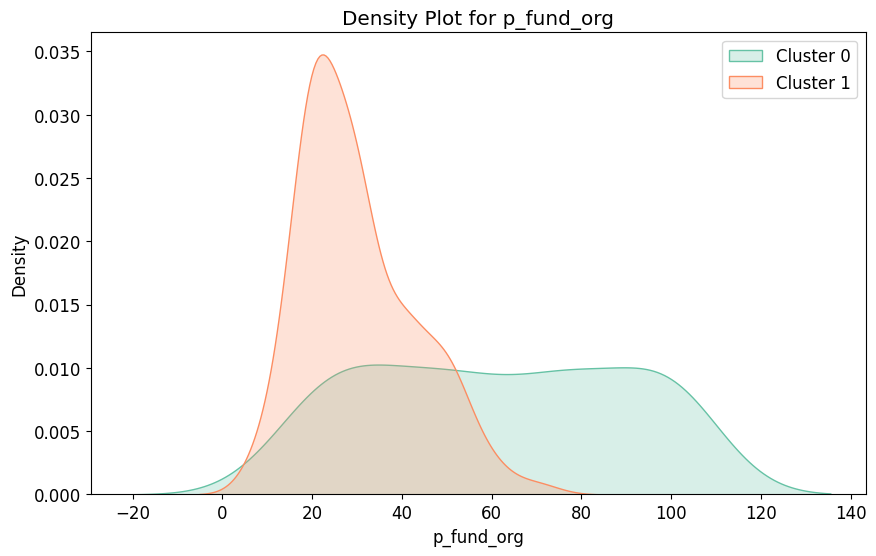

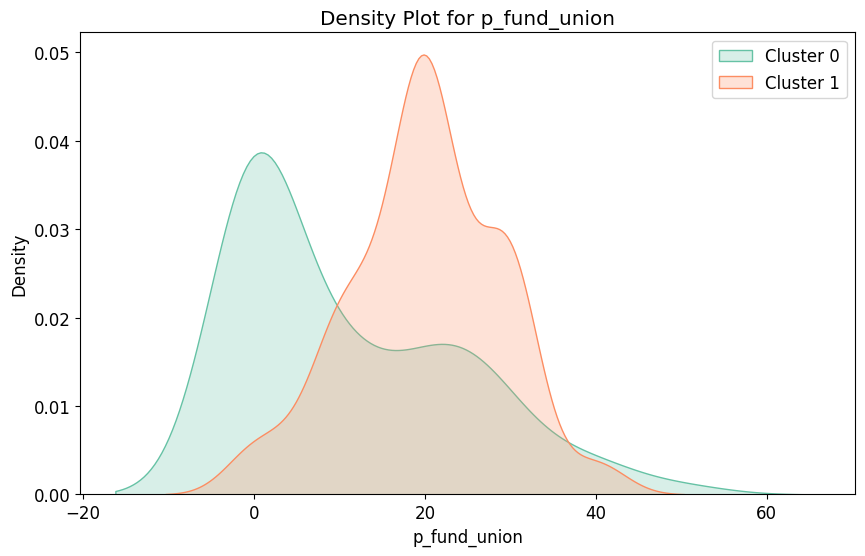

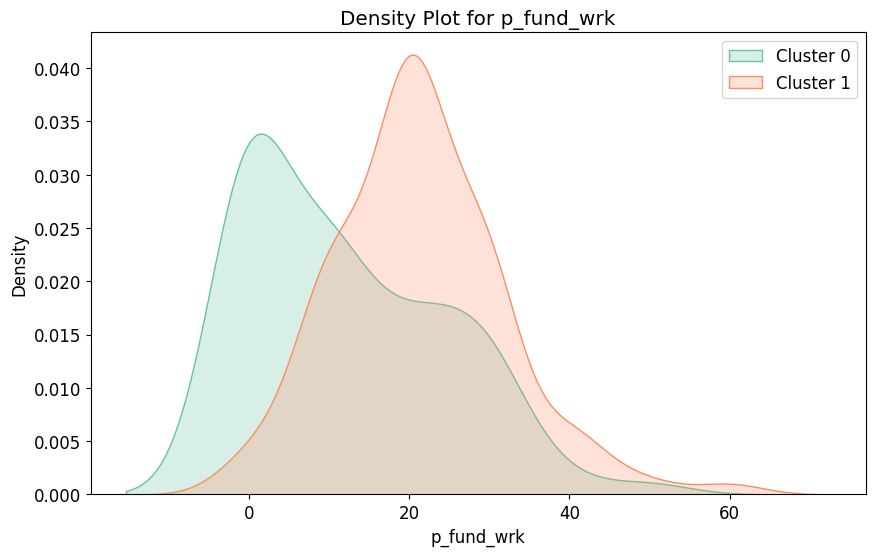

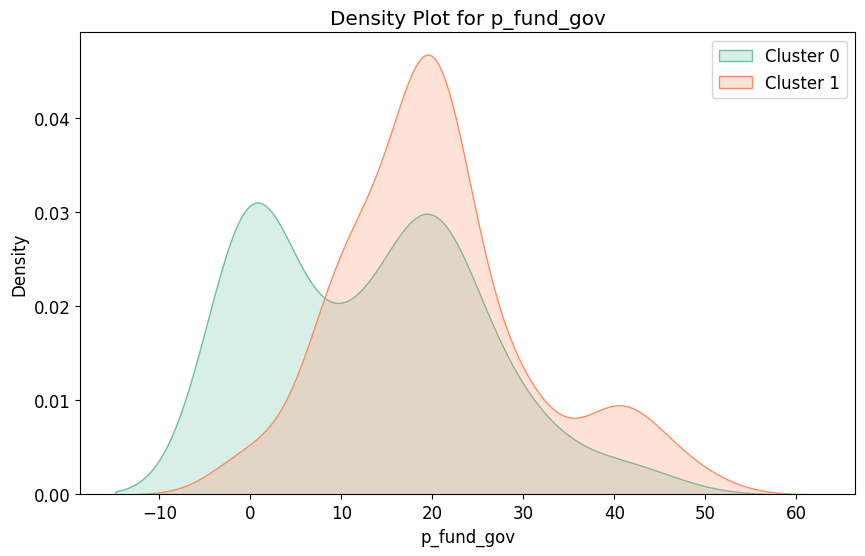

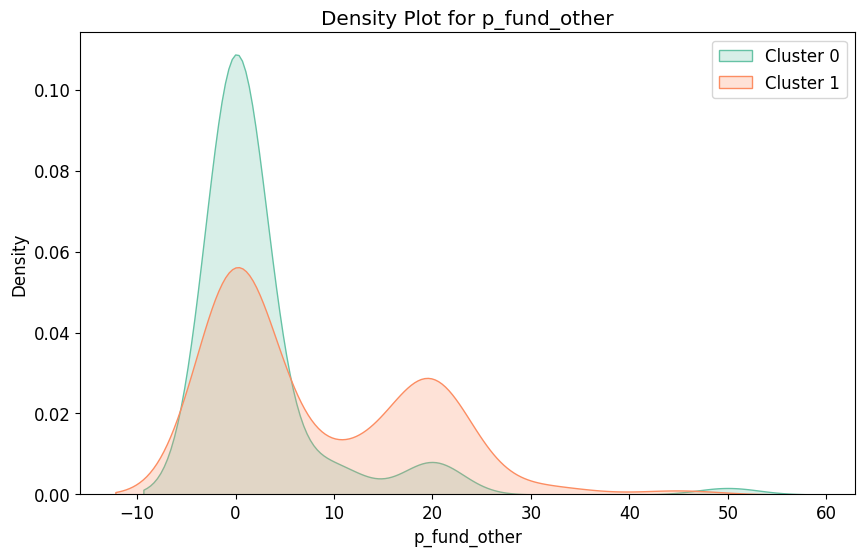

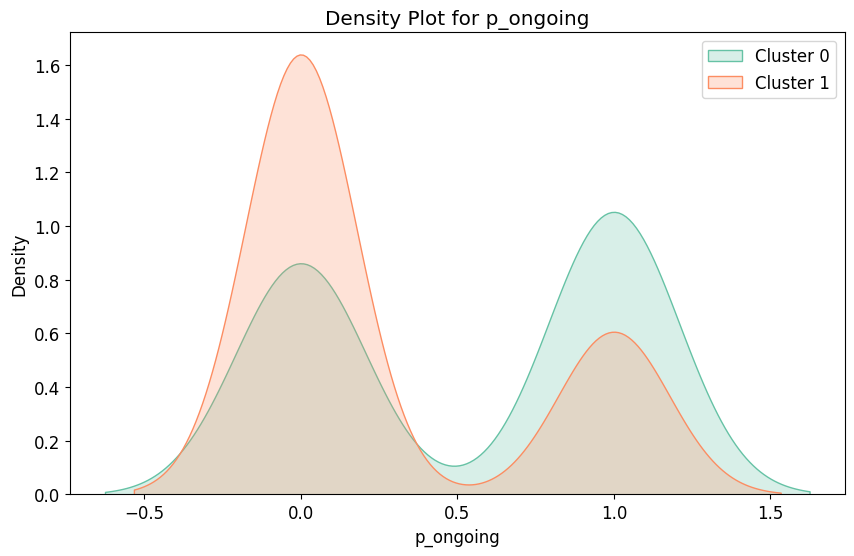

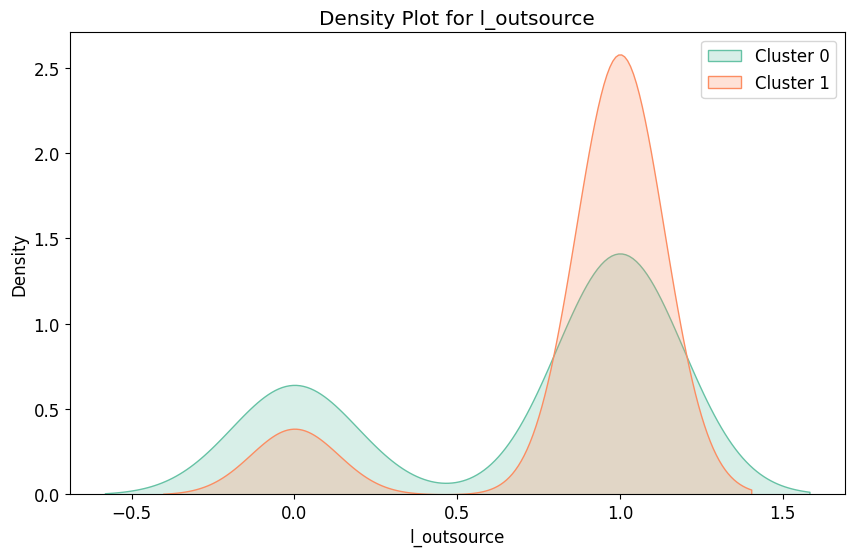

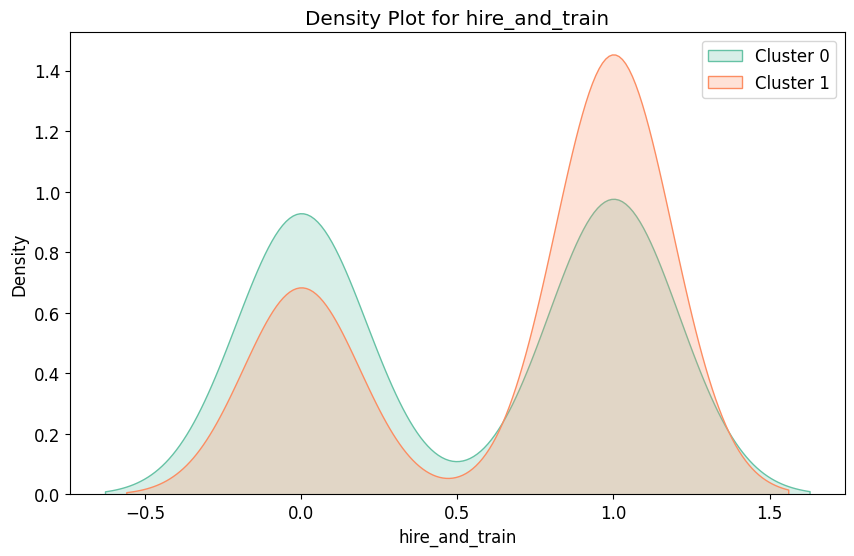

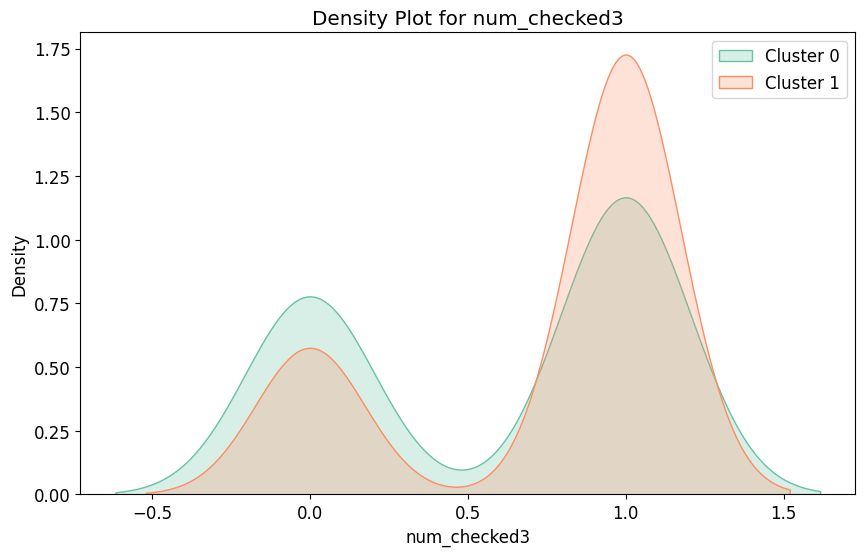

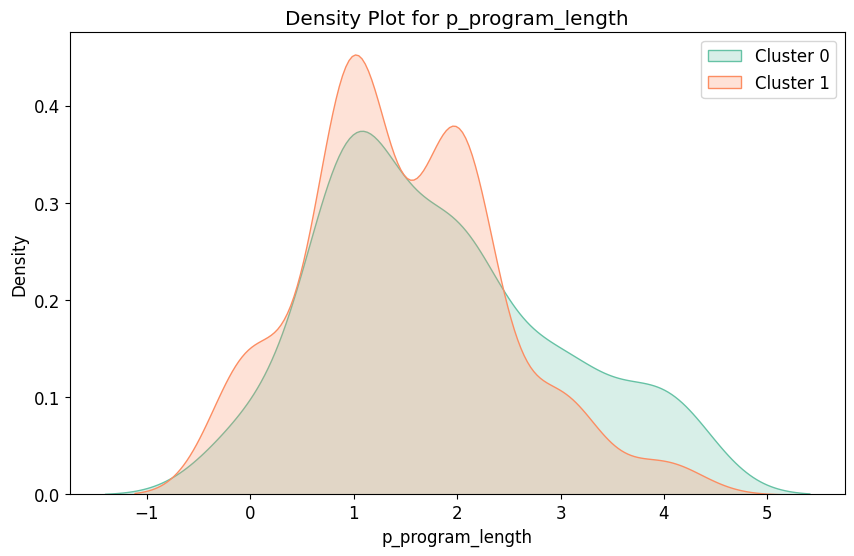

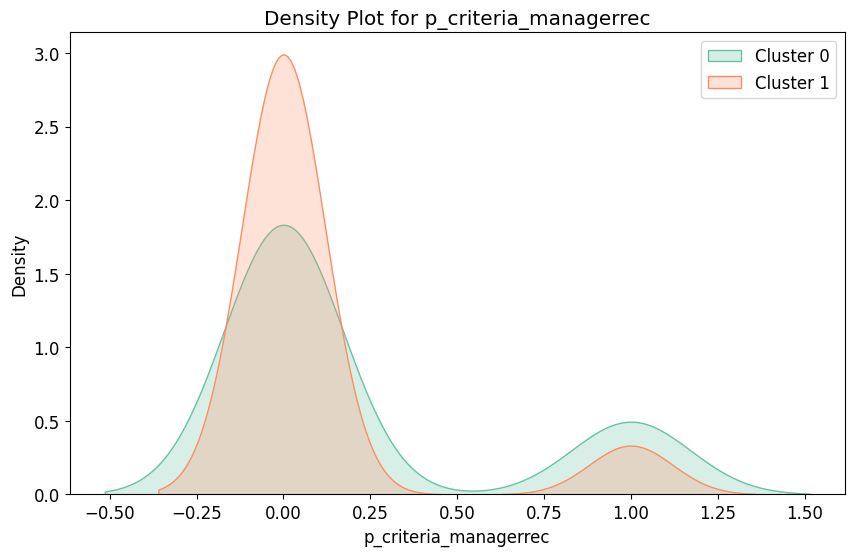

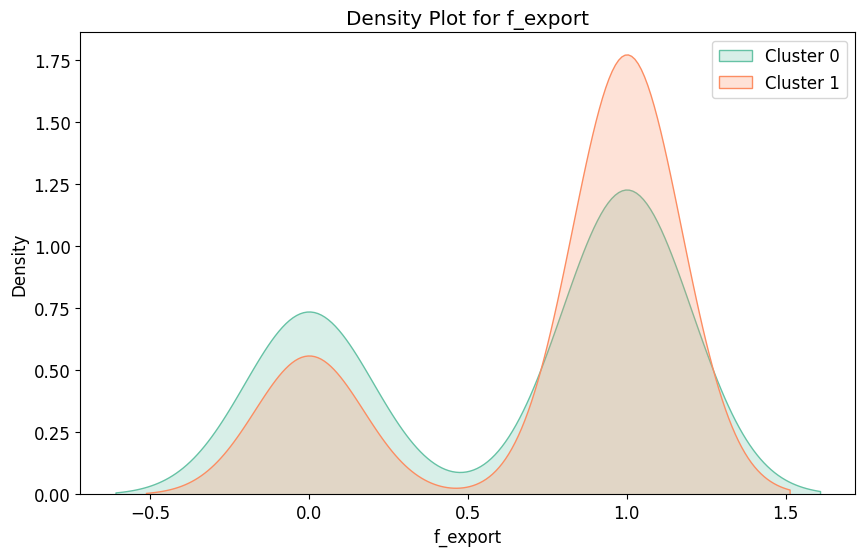

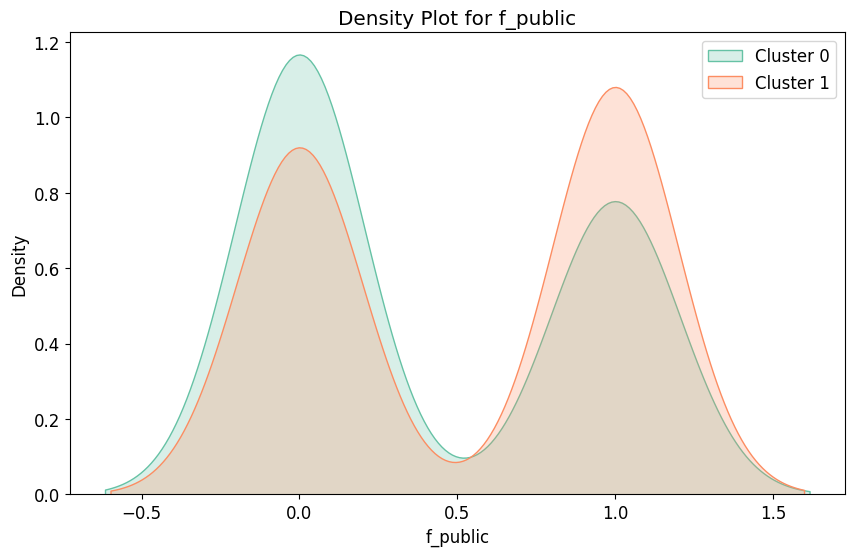

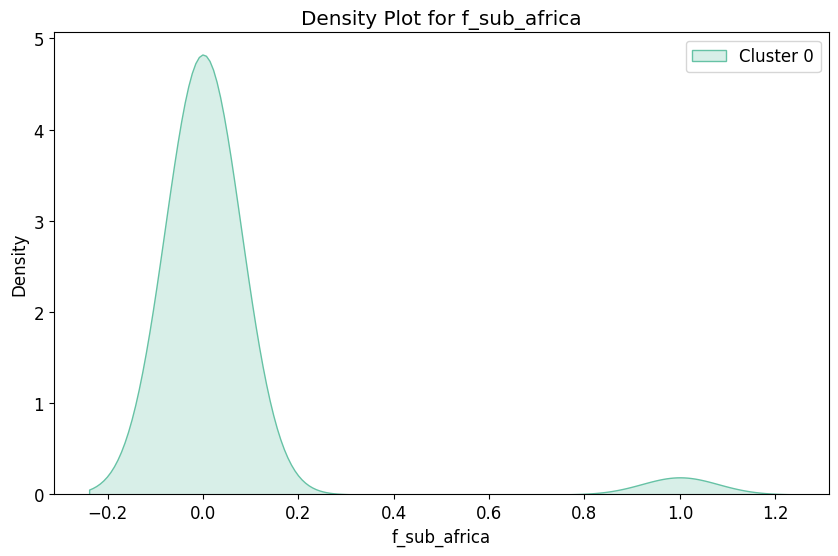

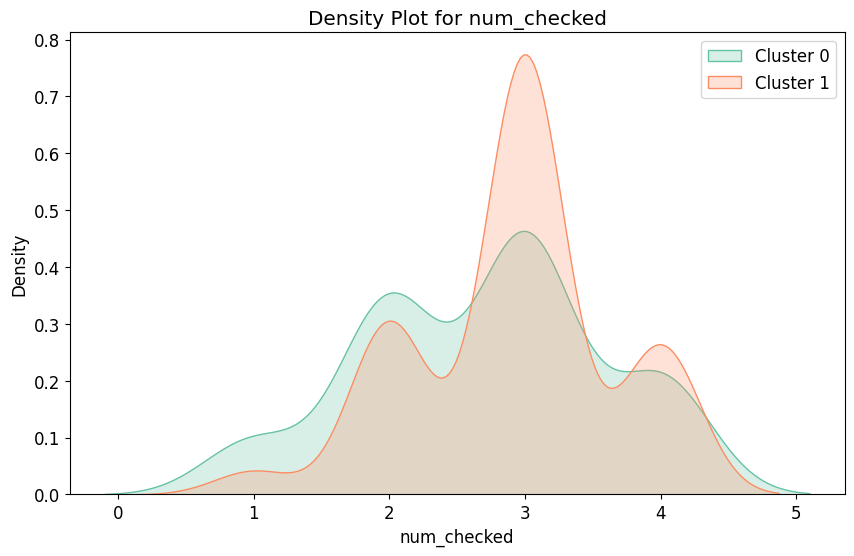

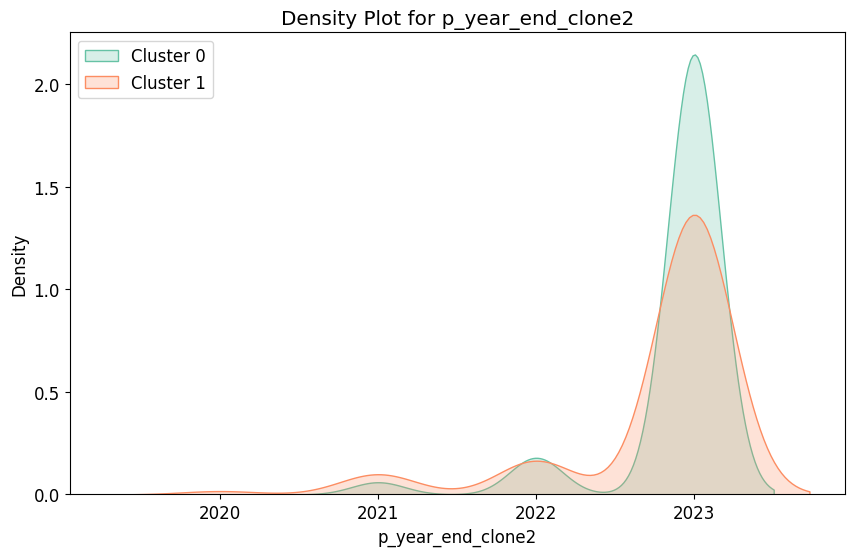

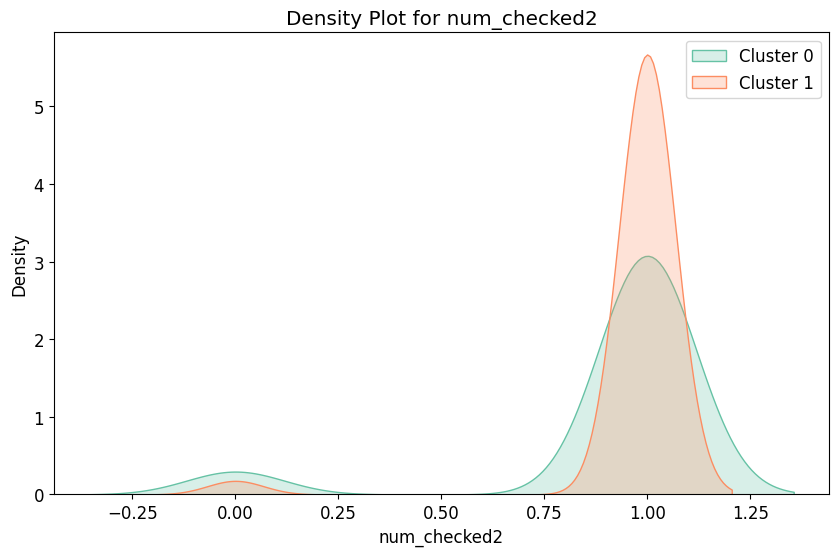

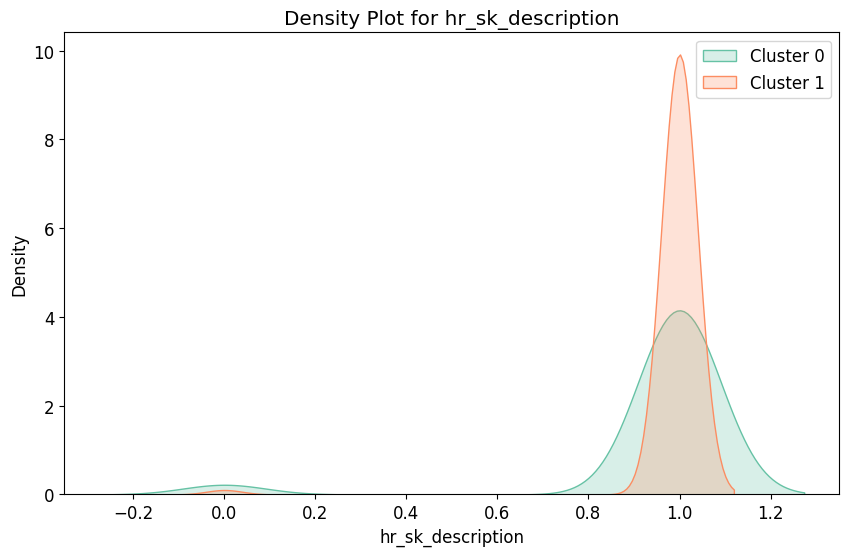

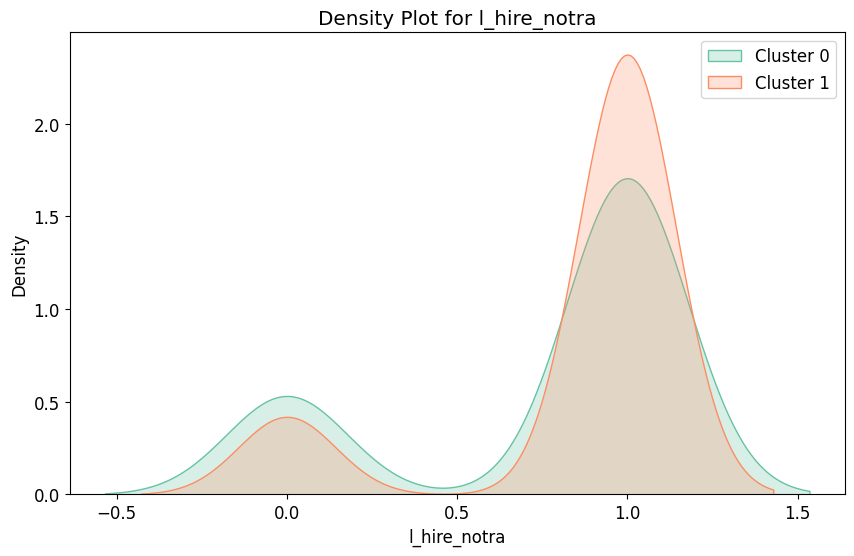

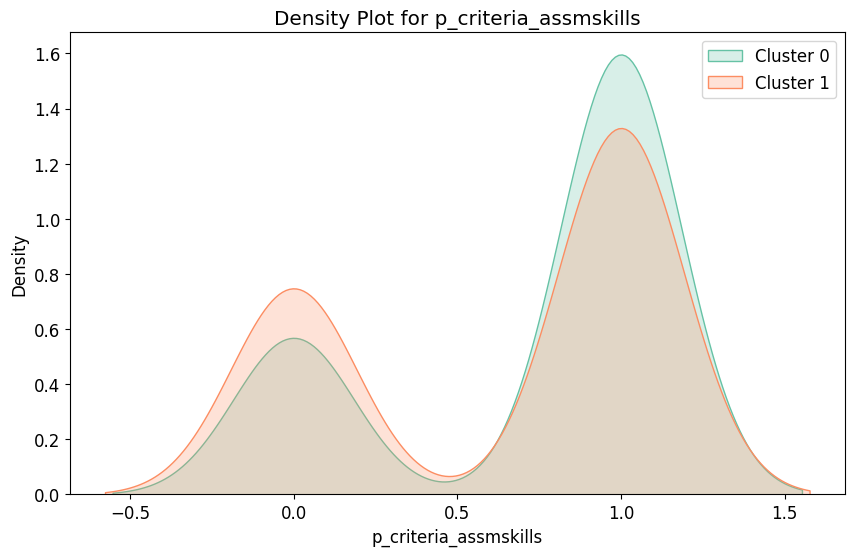


LaTeX Table for Two-Cluster Analysis (No Dummies):
\begin{tabular}{lcccc}
Feature & Mean Group X & SD Group X & Mean Group Y & SD Group Y & p-value \\
\hline
p_fund_org & 33.43 & 17.20 & 91.39 & 18.16 & 0.0000 \\
p_fund_union & 18.77 & 10.48 & 1.00 & 5.21 & 0.0000 \\
p_fund_wrk & 19.82 & 13.69 & 2.17 & 8.67 & 0.0000 \\
p_part & 66.33 & 16.79 & 38.68 & 23.31 & 0.0000 \\
tr_part & 66.33 & 16.79 & 38.68 & 23.31 & 0.0000 \\
p_fund_gov & 20.95 & 12.54 & 4.86 & 12.72 & 0.0000 \\
p_part_exp & 74.68 & 15.87 & 52.21 & 25.25 & 0.0000 \\
tr_part_exp & 74.68 & 15.87 & 52.21 & 25.25 & 0.0000 \\
p_fund_other & 7.03 & 9.84 & 0.58 & 3.63 & 0.0000 \\
p_eligibility & 66.99 & 15.85 & 51.23 & 23.34 & 0.0000 \\
\end{tabular}


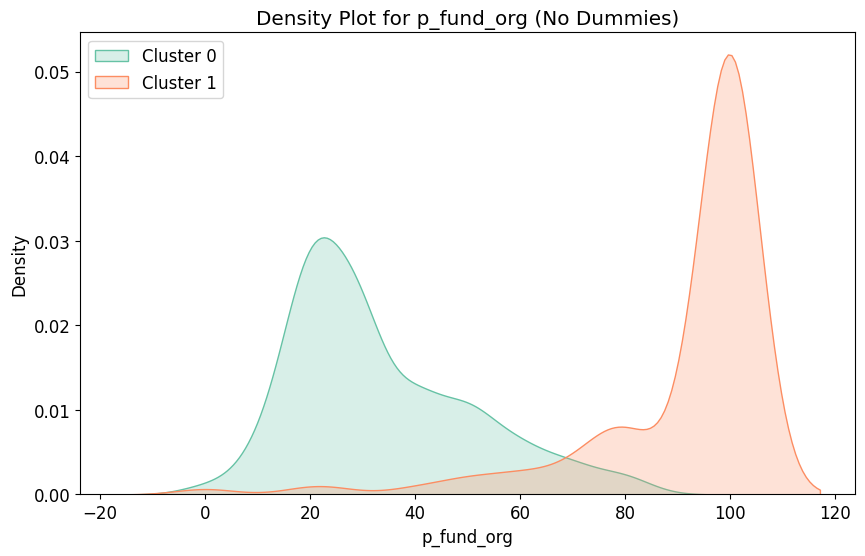

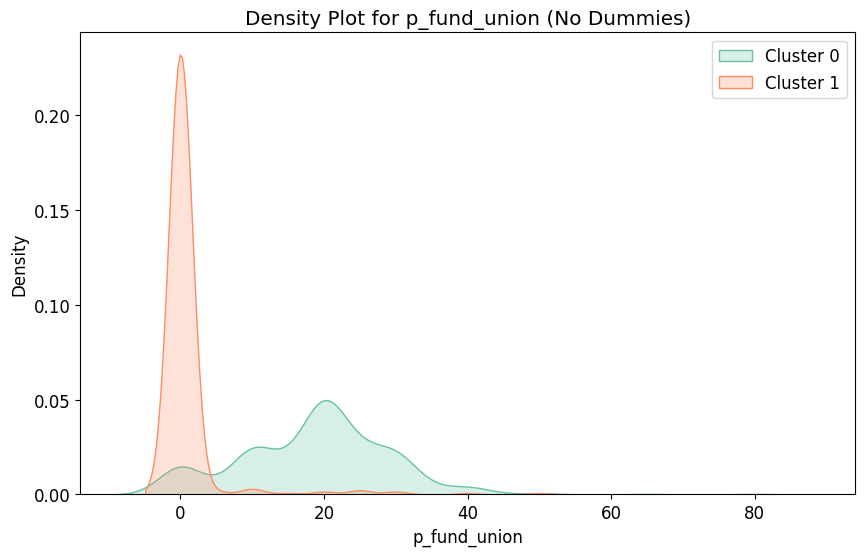

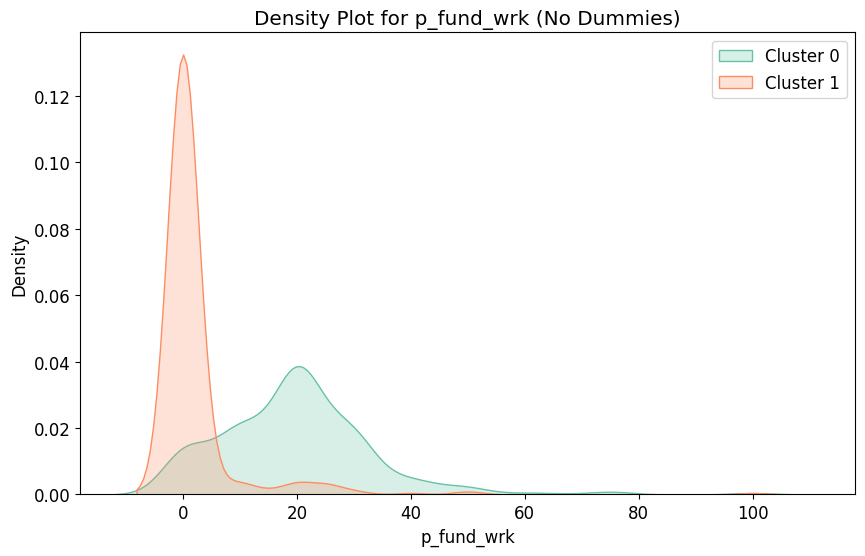

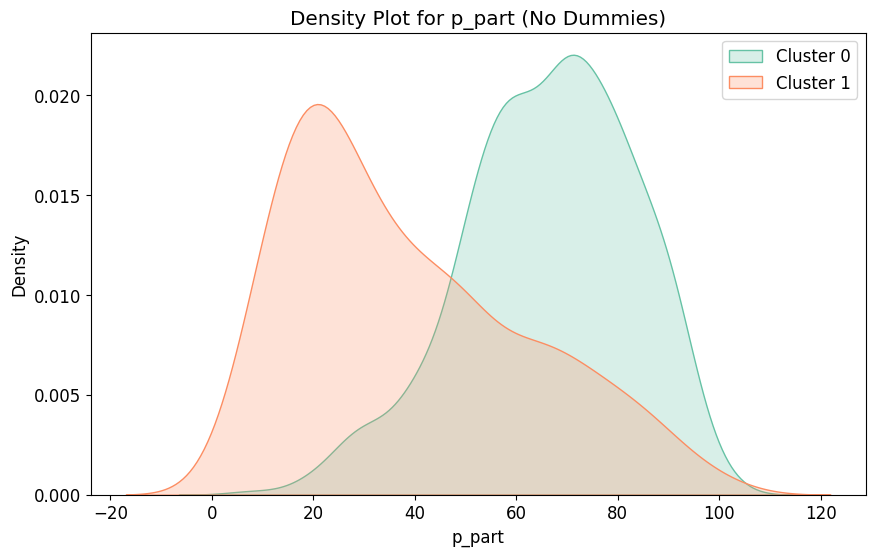

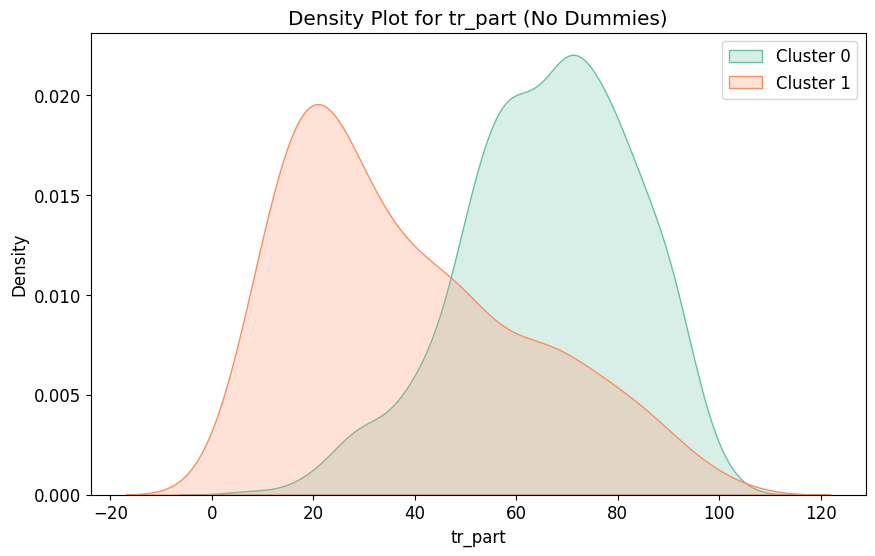

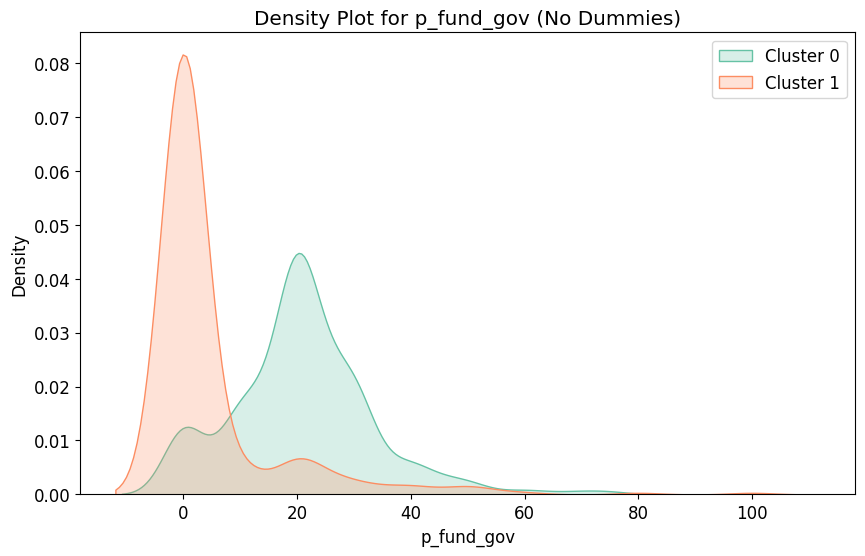

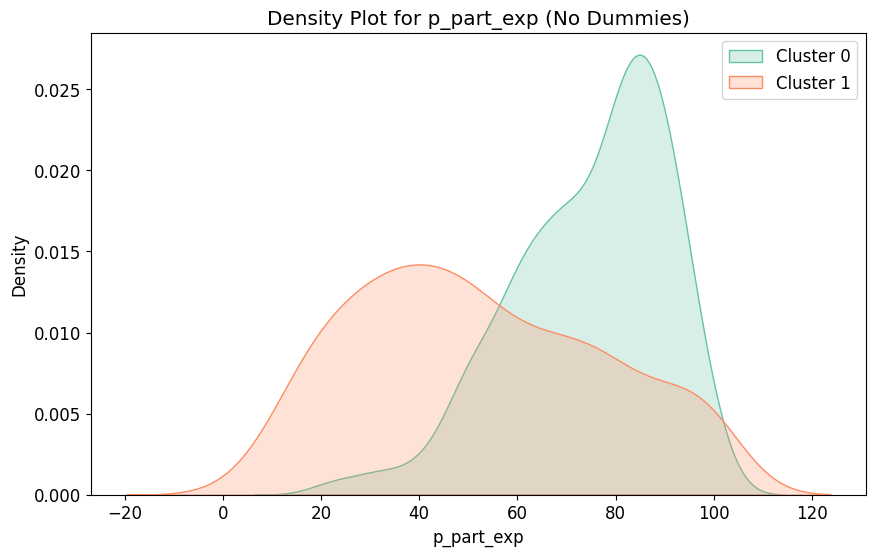

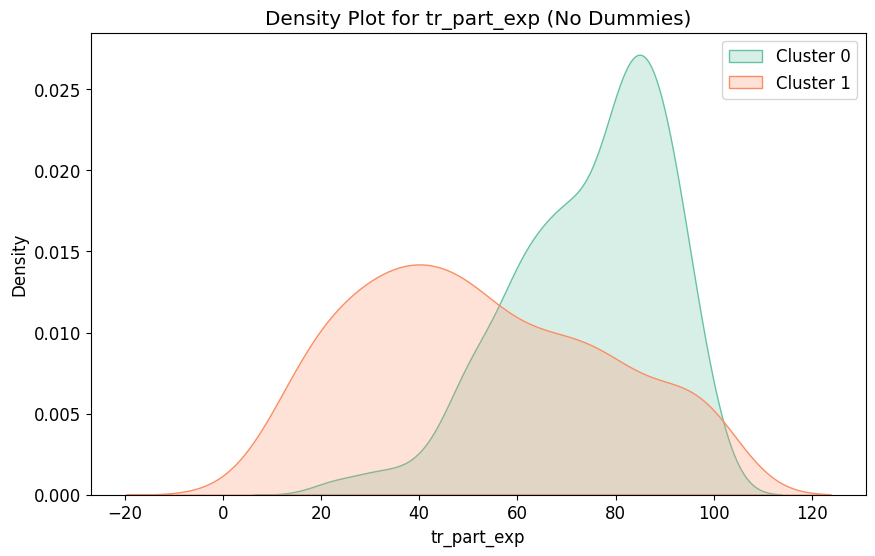

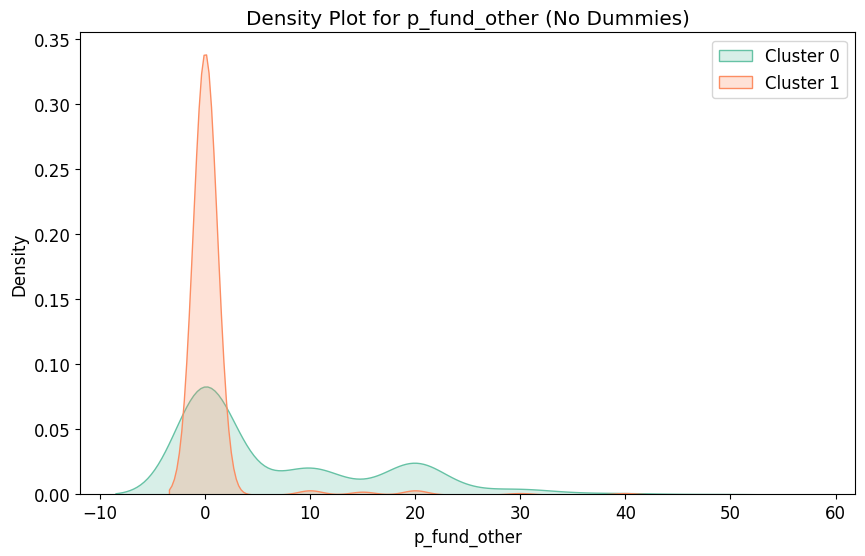

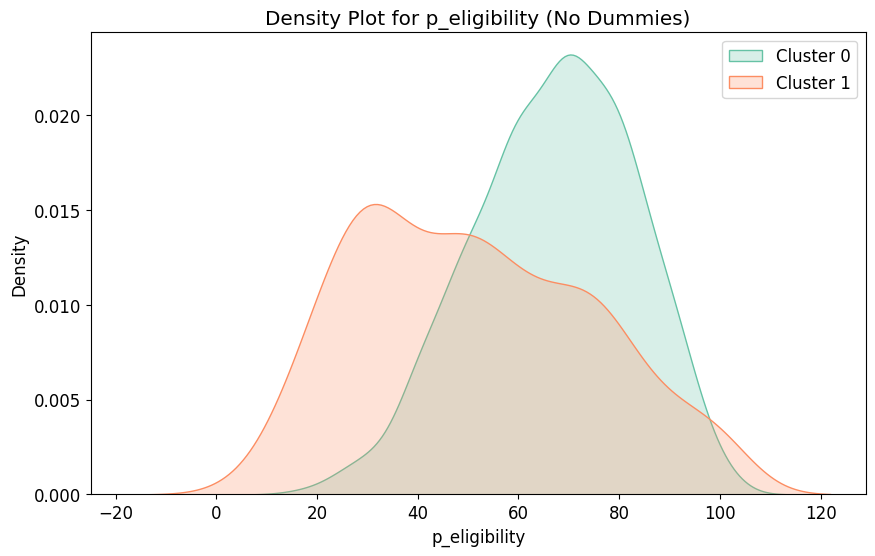

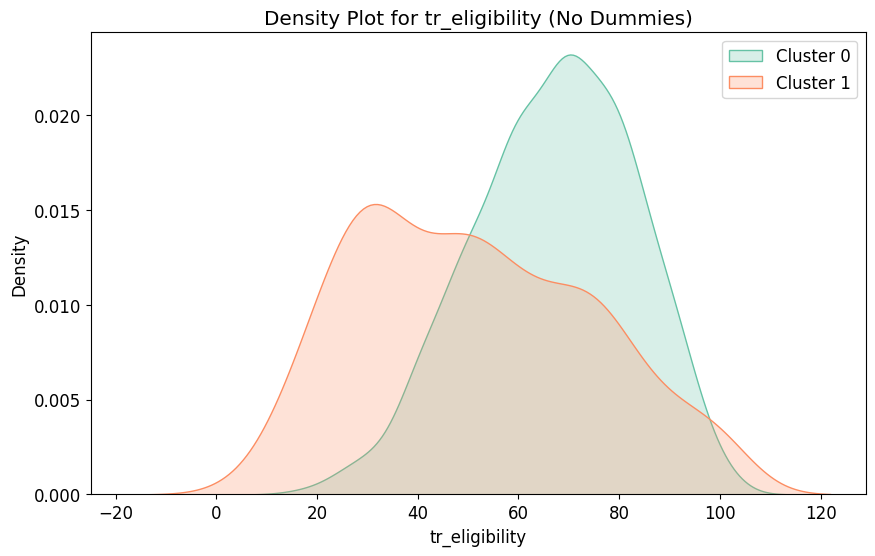

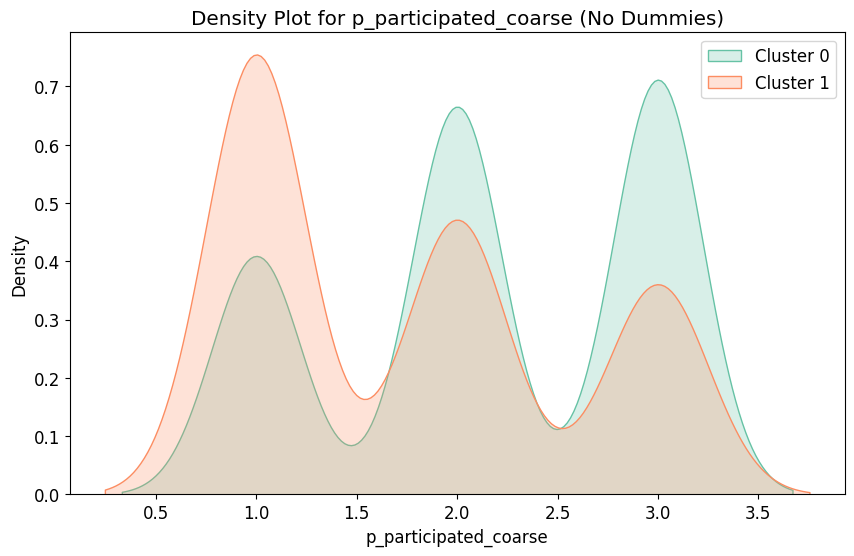

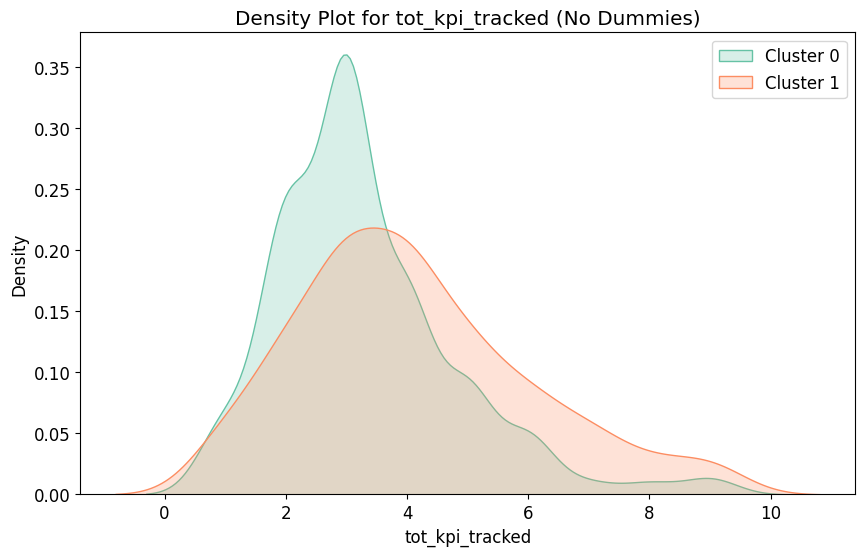

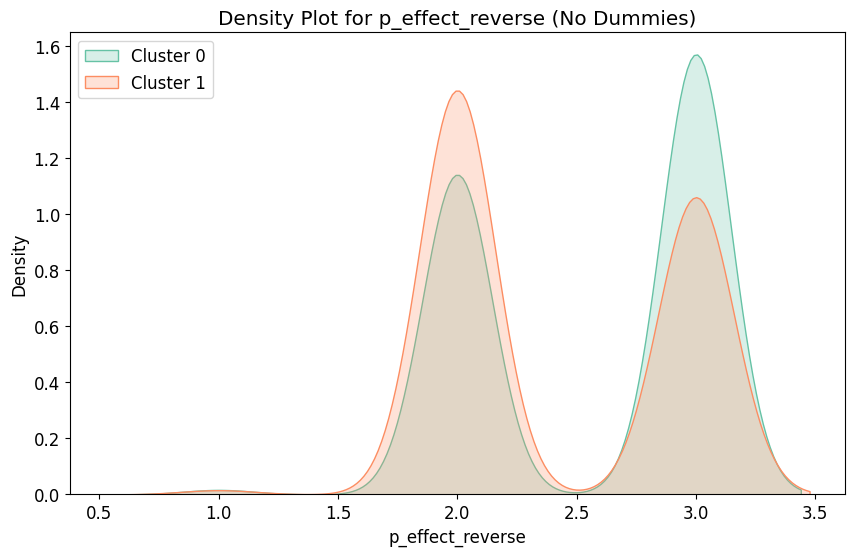

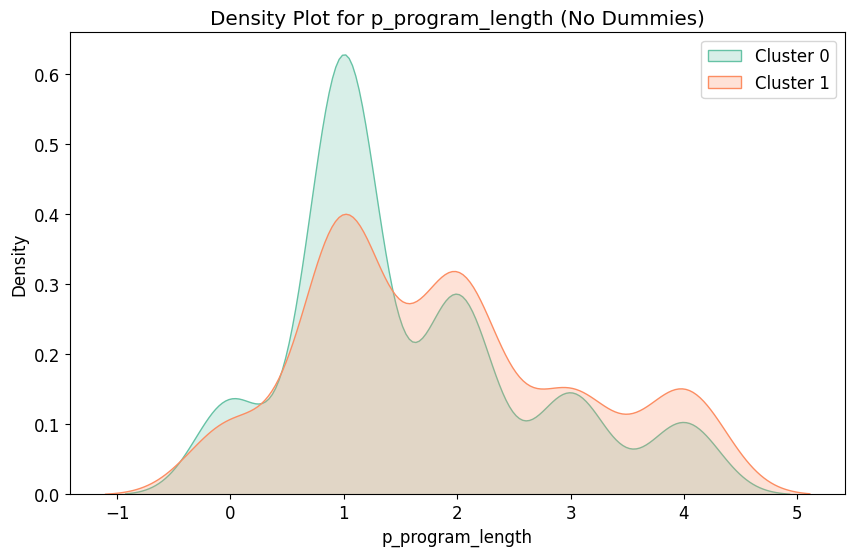

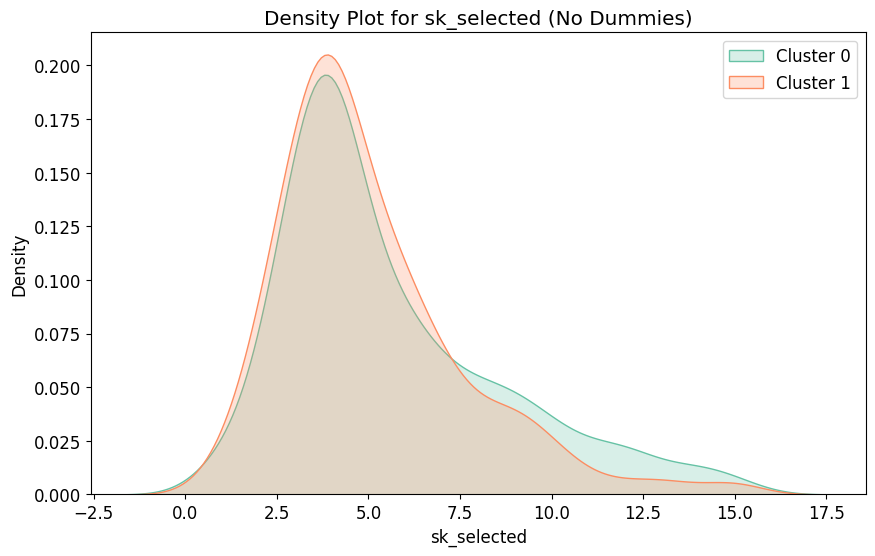

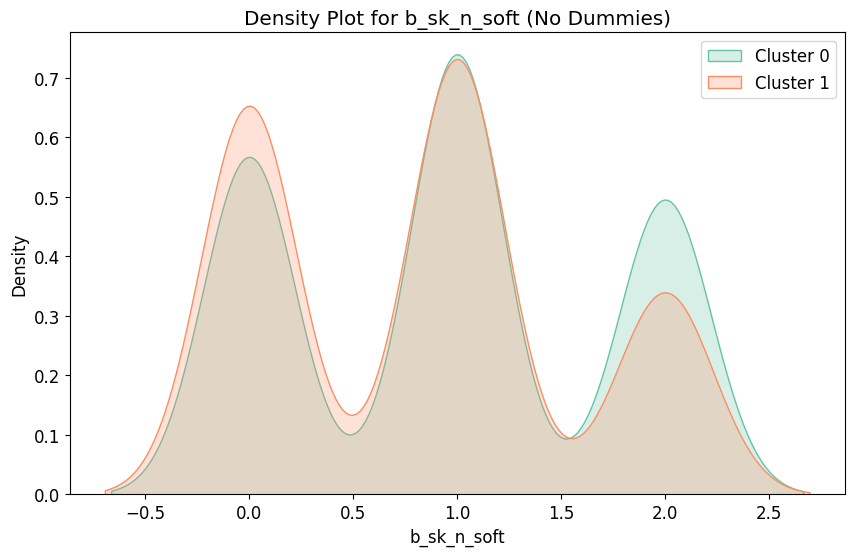

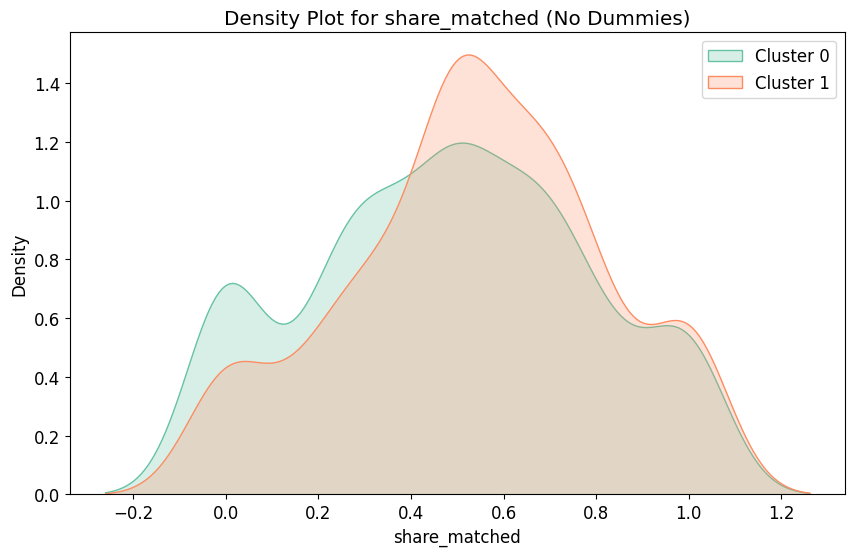

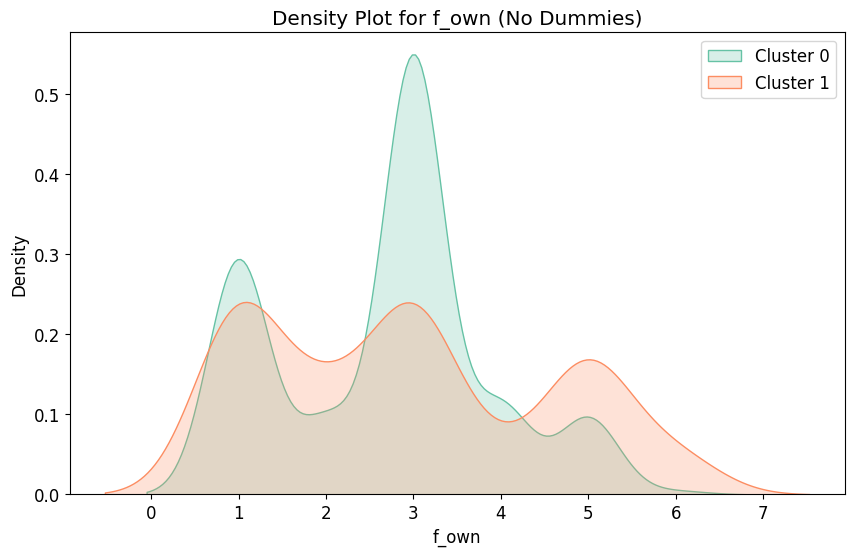

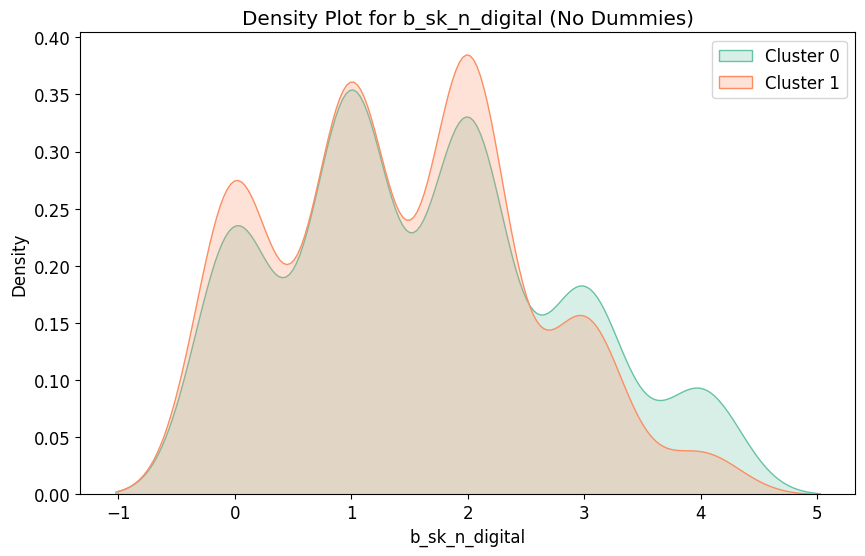

In [9]:
# Load and prepare 2-cluster data
from scipy import stats
df_2clusters = pd.read_csv("../Output/Results/clusters_2_construction.csv")

# Separate groups for analysis
group_X = df_2clusters[df_2clusters['KMeans_Cluster'] == 0]
group_Y = df_2clusters[df_2clusters['KMeans_Cluster'] == 1]

# Perform t-tests and compile results
results = []
for col in df_2clusters.columns:
    if col != 'KMeans_Cluster':
        t_stat, p_value = stats.ttest_ind(group_X[col], group_Y[col], equal_var=False)
        results.append((col, t_stat, p_value))

# Sort by p-value and select top 10
results_sorted = sorted(results, key=lambda x: x[2])[:10]

# Generate LaTeX table
latex_table = "\\begin{tabular}{lcccc}\n"
latex_table += "Feature & Mean Group X & SD Group X & Mean Group Y & SD Group Y & p-value \\\\\n"
latex_table += "\\hline\n"

for col, t_stat, p_value in results_sorted:
    mean_X = group_X[col].mean()
    sd_X = group_X[col].std()
    mean_Y = group_Y[col].mean()
    sd_Y = group_Y[col].std()
    latex_table += f"{col} & {mean_X:.2f} & {sd_X:.2f} & {mean_Y:.2f} & {sd_Y:.2f} & {p_value:.4f} \\\\\n"

latex_table += "\\end{tabular}"
print("LaTeX Table for Two-Cluster Analysis:")
print(latex_table)

# Create density plots for top 20 significant variables
results_top20 = sorted(results, key=lambda x: x[2])[:20]
top_20_significant_cols = [col for col, t_stat, p_value in results_top20]

for col in top_20_significant_cols:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(group_X[col], label='Cluster 0', shade=True)
    sns.kdeplot(group_Y[col], label='Cluster 1', shade=True)
    plt.title(f'Density Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.savefig(f"{col}.png")
    plt.show()

# Analysis without dummy variables
# Load and prepare data
df = pd.read_stata("../Data/V1_qualflags_analysis2_ML.dta")
df_numeric = df.apply(pd.to_numeric, errors='coerce')
df_numeric = df_numeric.dropna(axis=1, how='all')

def es_dummy(col):
    return col.dropna().isin([0, 1]).all()

# Remove dummy variables and year columns
df_sin_dummies = df_numeric.loc[:, ~df_numeric.apply(es_dummy)]
df_sin_year = df_sin_dummies.loc[:, ~df_sin_dummies.columns.str.contains('year', case=False)]

# UMAP dimensionality reduction
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df_sin_year.dropna())

# Apply K-Means clustering
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(embedding)

# Prepare data for analysis
df_analysis = df_sin_year.dropna().copy()
df_analysis['KMeans_Cluster'] = cluster_labels_kmeans

# Separate groups
group_X = df_analysis[df_analysis['KMeans_Cluster'] == 0]
group_Y = df_analysis[df_analysis['KMeans_Cluster'] == 1]

# Perform t-tests
results = []
for col in df_analysis.columns:
    if col != 'KMeans_Cluster':
        t_stat, p_value = stats.ttest_ind(group_X[col], group_Y[col], equal_var=False)
        results.append((col, t_stat, p_value))

# Sort by p-value and select top 10
results_sorted = sorted(results, key=lambda x: x[2])[:10]

# Generate LaTeX table for non-dummy analysis
latex_table = "\\begin{tabular}{lcccc}\n"
latex_table += "Feature & Mean Group X & SD Group X & Mean Group Y & SD Group Y & p-value \\\\\n"
latex_table += "\\hline\n"

for col, t_stat, p_value in results_sorted:
    mean_X = group_X[col].mean()
    sd_X = group_X[col].std()
    mean_Y = group_Y[col].mean()
    sd_Y = group_Y[col].std()
    latex_table += f"{col} & {mean_X:.2f} & {sd_X:.2f} & {mean_Y:.2f} & {sd_Y:.2f} & {p_value:.4f} \\\\\n"

latex_table += "\\end{tabular}"
print("\nLaTeX Table for Two-Cluster Analysis (No Dummies):")
print(latex_table)

# Create density plots for top 20 significant variables
results_top20 = sorted(results, key=lambda x: x[2])[:20]
top_20_significant_cols = [col for col, t_stat, p_value in results_top20]

for col in top_20_significant_cols:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(group_X[col], label='Cluster 0', shade=True)
    sns.kdeplot(group_Y[col], label='Cluster 1', shade=True)
    plt.title(f'Density Plot for {col} (No Dummies)')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()